In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import glob
import numpy as np

"""Remove texts with multiple cases from the corpus"""

sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)
dic_df = {}

modeles = []
for file in glob.glob("../../annotated_data/filtered_generations/*.csv"):
    if "full_corpus" not in file:
        print(file)
        df = pd.read_csv(file)
        modele = file.split("_")[-3].split(".")[0]
        modeles.append(modele)
        df["model"]=modele
        dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
#data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
data_genre = data_genre[data_genre["cas_multiples"]==0]

data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

../../annotated_data/filtered_generations/generations_Llama-3-1-8B-Instruct_gender_trf.csv
../../annotated_data/filtered_generations/generations_bloom-7b1_gender_trf.csv
../../annotated_data/filtered_generations/generations_Llama-3-1-8B_gender_trf.csv
../../annotated_data/filtered_generations/generations_vigogne-2-13b_gender_trf.csv
../../annotated_data/filtered_generations/generations_bloom-1b1_gender_trf.csv
../../annotated_data/filtered_generations/generations_vigogne-2-7b_gender_trf.csv
../../annotated_data/filtered_generations/generations_BioMistral-7b-SLERP_gender_trf.csv


Unnamed: 0.1  Unnamed: 0              fichier_ref pathologie  \
0                 0           0  filepdf-56-cas_prostate   prostate   
1                 1           1  filepdf-56-cas_prostate   prostate   
2                 2           2  filepdf-56-cas_prostate   prostate   
3                 3           3  filepdf-56-cas_prostate   prostate   
4                 4           4  filepdf-56-cas_prostate   prostate   
...             ...         ...                      ...        ...   
20995          2995        2995   filepdf-194-cas_ovaire     ovaire   
20996          2996        2996   filepdf-194-cas_ovaire     ovaire   
20997          2997        2997   filepdf-194-cas_ovaire     ovaire   
20998          2998        2998   filepdf-194-cas_ovaire     ovaire   
20999          2999        2999   filepdf-194-cas_ovaire     ovaire   

                                              generation  \
0      Mme D.A âgée de 49 ans, sans antécédents patho...   
1      Nous rapportons le cas d’une patiente de 49 an...   
2      Nous rapportons le cas d’une patiente âgée de ...   
3      Patiente d’âge de 49 ans a présenté des douleu...   
4      Mme A.F est une patiente de 49 ans qui présent...   
...                                                  ...   
20995  Il s’agissait d’une femme de 55 ans, 2ème pare...   
20996  Patiente âgée de 55 ans, 2ème pare, 3ème geste...   
20997  Mme D.G, âgée de 55 ans, 2ème pare, 3ème geste...   
20998  Il s’agissait d’une femme âgée de 55 ans, 2ème...   
20999  Il s’agit d’une patiente âgée de 55 ans, 2ème ...   

                                                   input sex_prompt  \
0      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
1      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
2      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
3      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
4      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
...                                                  ...        ...   
20995  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20996  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20997  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20998  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20999  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   

       age_prompt  nb_contraintes  respect_contraintes  scores_reps  \
0              49              17                 0.65         0.04   
1              49              17                 0.82         0.03   
2              49              17                 0.82         0.04   
3              49              17                 0.59         0.08   
4              49              17                 0.82         0.04   
...           ...             ...                  ...          ...   
20995          55              20                 0.65         0.01   
20996          55              20                 0.60         0.07   
20997          55              20                 0.50         0.07   
20998          55              20                 0.65         0.11   
20999          55              20                 0.60         0.02   

       delimitations_cas  cas_multiples  new_gen Identified_gender  \
0                      1              0    False          Feminine   
1                      1              0    False          Feminine   
2                      1              0    False          Feminine   
3                      1              0    False          Feminine   
4                      1              0    False          Feminine   
...                  ...            ...      ...               ...   
20995                  1              0     True          Feminine   
20996                  1              0     True          Feminine   
20997                  1              0     True          Feminine   
20998                  1   

In [2]:
data_genre.groupby("model").size()

model
BioMistral-7b-SLERP      3000
Llama-3-1-8B             3000
Llama-3-1-8B-Instruct    3000
bloom-1b1                3000
bloom-7b1                3000
vigogne-2-13b            3000
vigogne-2-7b             3000
dtype: int64

In [4]:
data_genre.groupby("pathologie").size()


pathologie
COVID-19         2100
colon            2100
depression       2100
drepanocytose    2100
infarctus        2100
osteoporose      2100
ovaire           2100
prostate         2100
sein             2100
vessie           2100
dtype: int64

In [3]:
modeles

['Llama-3-1-8B-Instruct',
 'bloom-7b1',
 'Llama-3-1-8B',
 'vigogne-2-13b',
 'bloom-1b1',
 'vigogne-2-7b',
 'BioMistral-7b-SLERP']

## DATA EXPLORATION: shape, nb of instances per category (= generated gender)

/tmp/ipykernel_73226/2834963564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


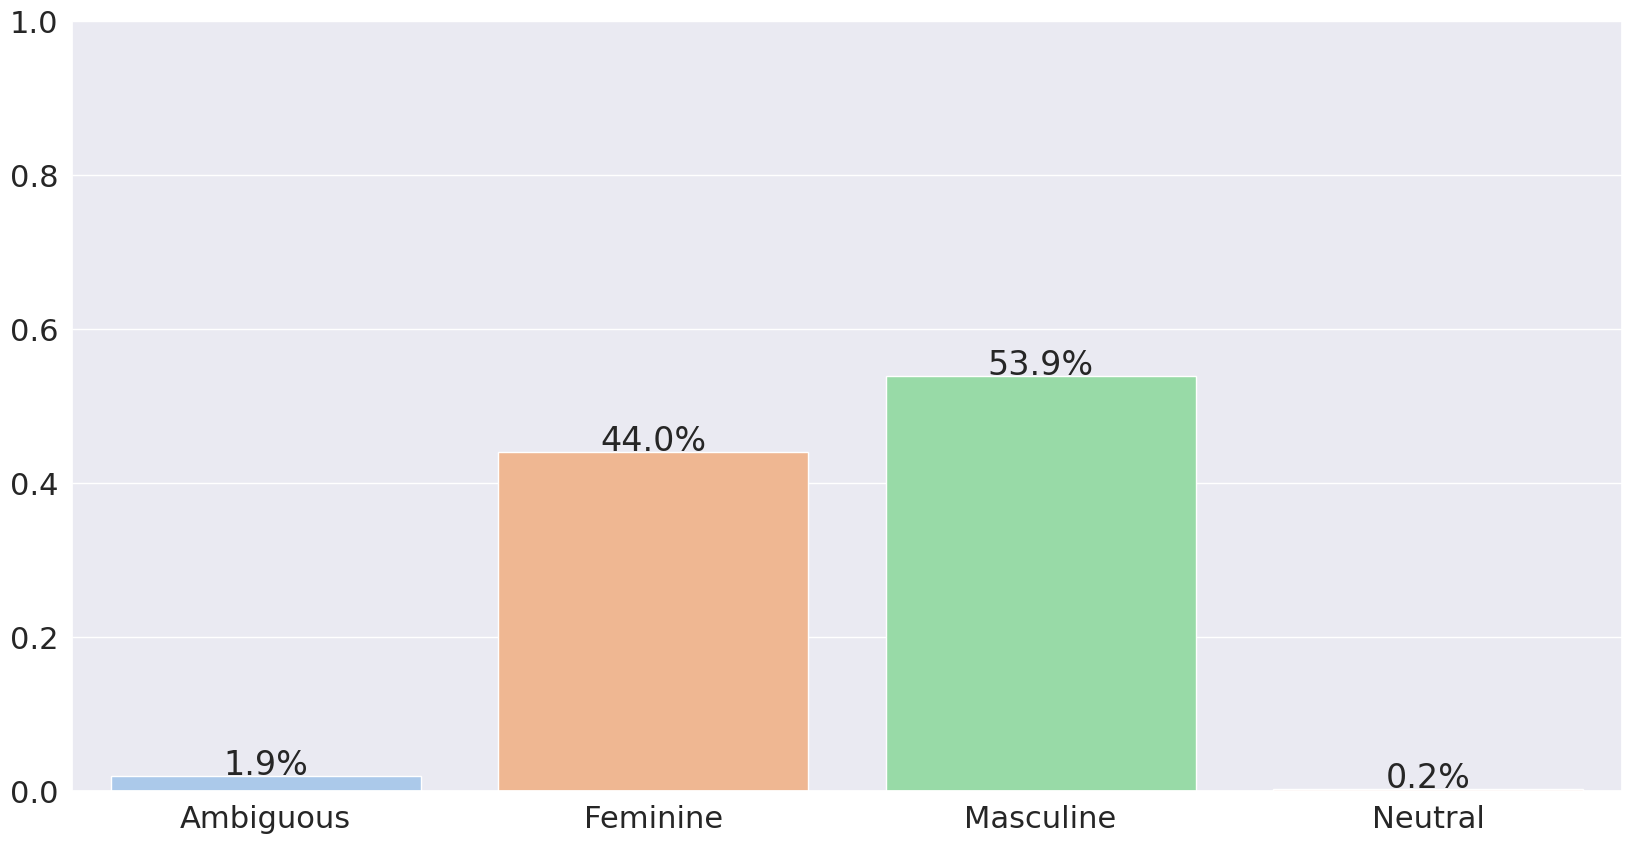

{'Masculine': 0.5386190476190477,
 'Feminine': 0.43961904761904763,
 'Ambiguous': 0.01938095238095238,
 'Neutral': 0.002380952380952381}

In [4]:
def exploration_donnees(dataset, label, gender, savefig=False, savecsv=False):
    # gender = féminin, masculin, undetermined, all => filtre pour voir résultats selon genre du prompt
    if gender == "all":
        dataset = dataset
    else:
        dataset = dataset[dataset["sex_prompt"] == gender]
    x = dataset[label].value_counts(normalize=True)

    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)

    ax.set_ylim(0,1)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{gender}.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

# ON ALL PROMPTS
exploration_donnees(data_genre,label,"all")

/tmp/ipykernel_73226/2226417632.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)
/tmp/ipykernel_73226/2226417632.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)
/tmp/ipykernel_73226/2226417632.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)


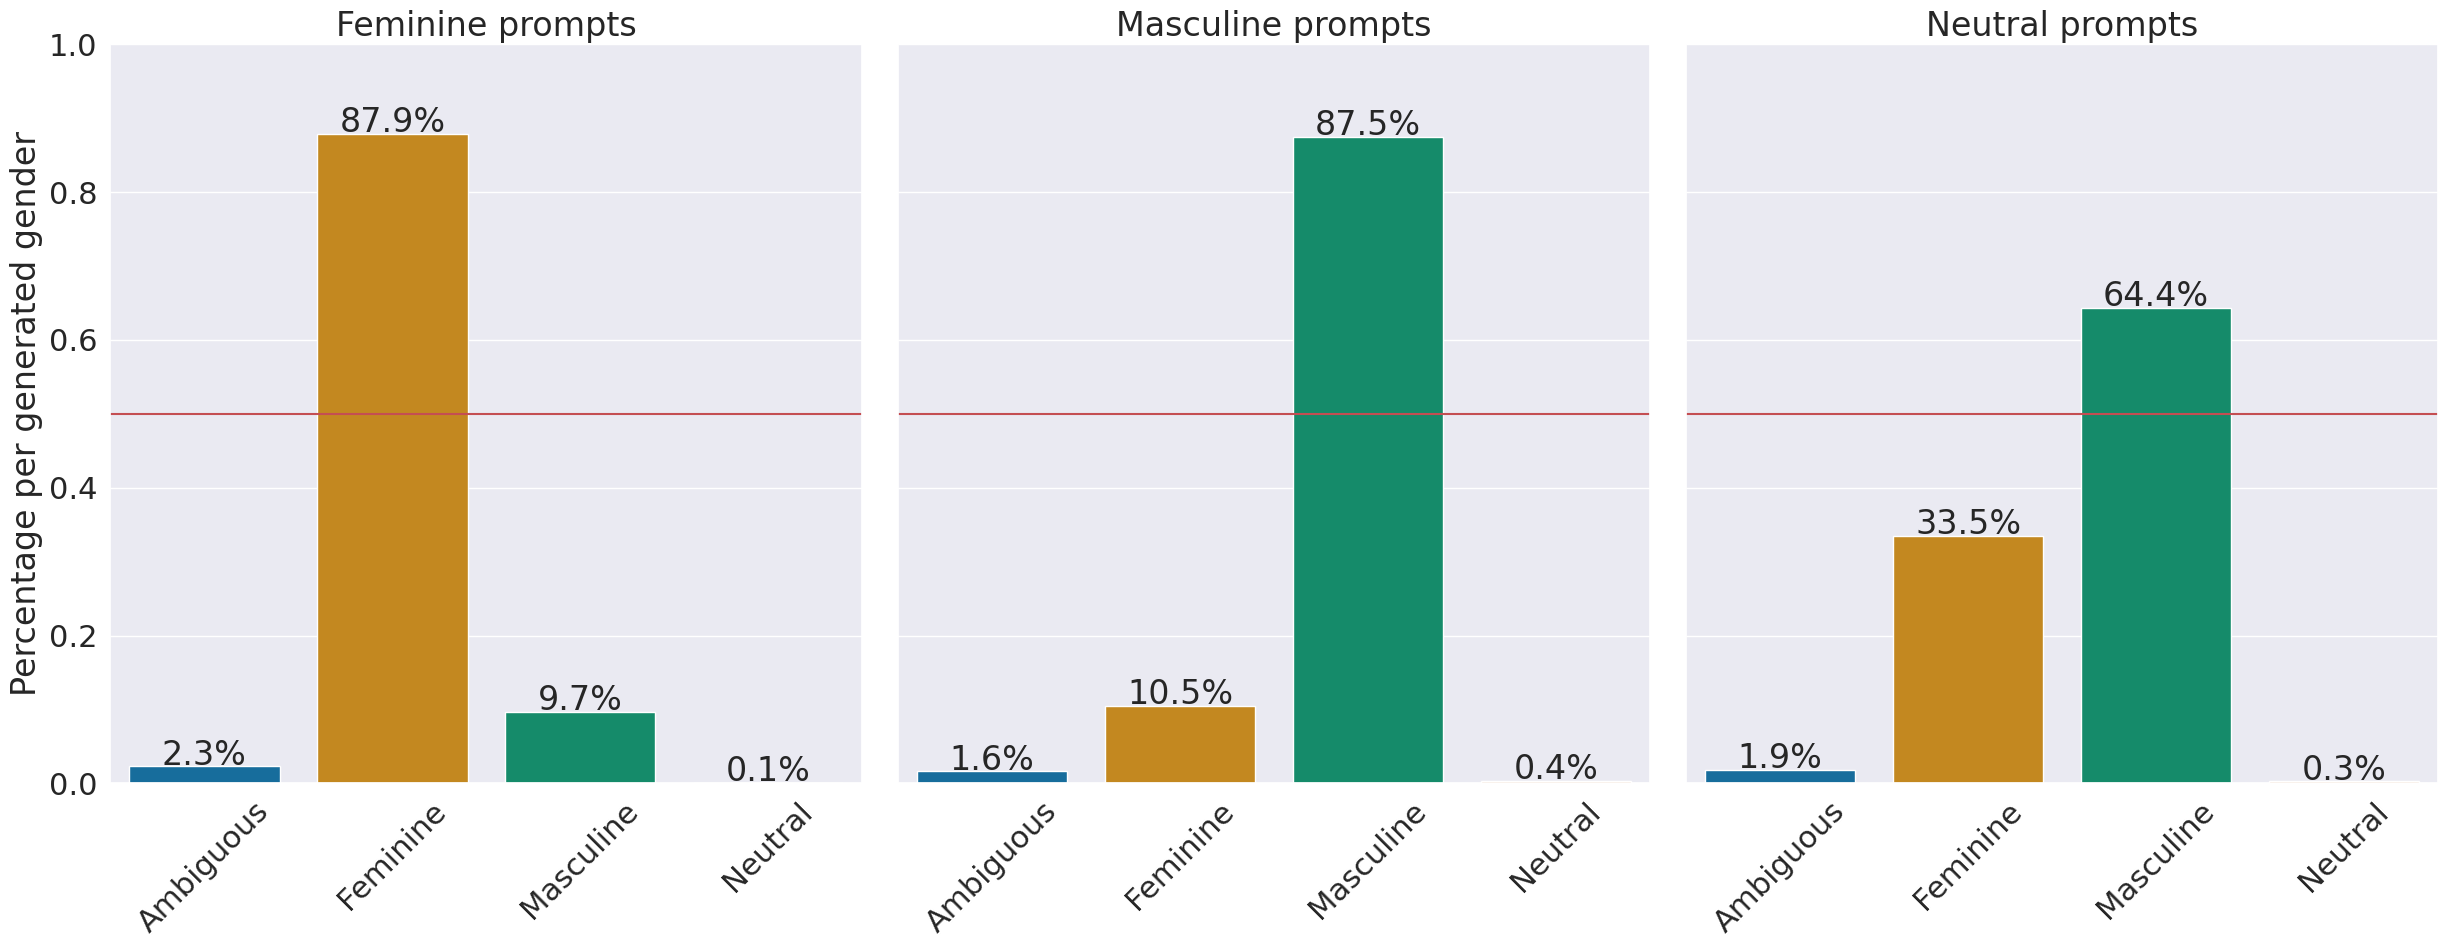

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def exploration_donnees_subplots(dataset, label, savefig=False):
    genders = ["féminin", "masculin", "neutre"]#, "all"]
    
    # Set up the subplot grid (adjust the number of rows/columns based on your preferences)
    fig, axes = plt.subplots(1, len(genders), figsize=(25, 10), sharey=True)
    #  figsize=(20, 10)
    sns.set(font_scale=2)
    
    for i, gender in enumerate(genders):
        if gender == "all":
            data = dataset
        else:
            data = dataset[dataset["sex_prompt"] == gender]
        
        x = data[label].value_counts(normalize=True)
        colors = sns.color_palette("colorblind", len(x))
        en_genders = {"féminin":"feminine", "masculin": "masculine", "neutre":"neutral"}
        
        ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)
        ax.set_ylim(0, 1)
        ax.axhline(y=0.5, color='r', linestyle='-')
        ax.set_ylabel('' if i != 0 else 'Percentage per generated gender')
        ax.set_xlabel('')
        #ax.set_title("Prompts "+gender+"s")    
        ax.set_title(en_genders[gender].capitalize()+" prompts")
        ax.tick_params(axis='x', labelrotation=45)
        
        # Annotate bars with percentages
        for p in ax.patches:
            ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 8), textcoords='offset points')
        
    plt.tight_layout()
    
    if savefig:
        plt.savefig(f"../../bias_results/fig/gender_distributions_sexprompts_nomulti.pdf", bbox_inches="tight")
    
    plt.show()

exploration_donnees_subplots(data_genre, label, True)

/tmp/ipykernel_73226/2834963564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


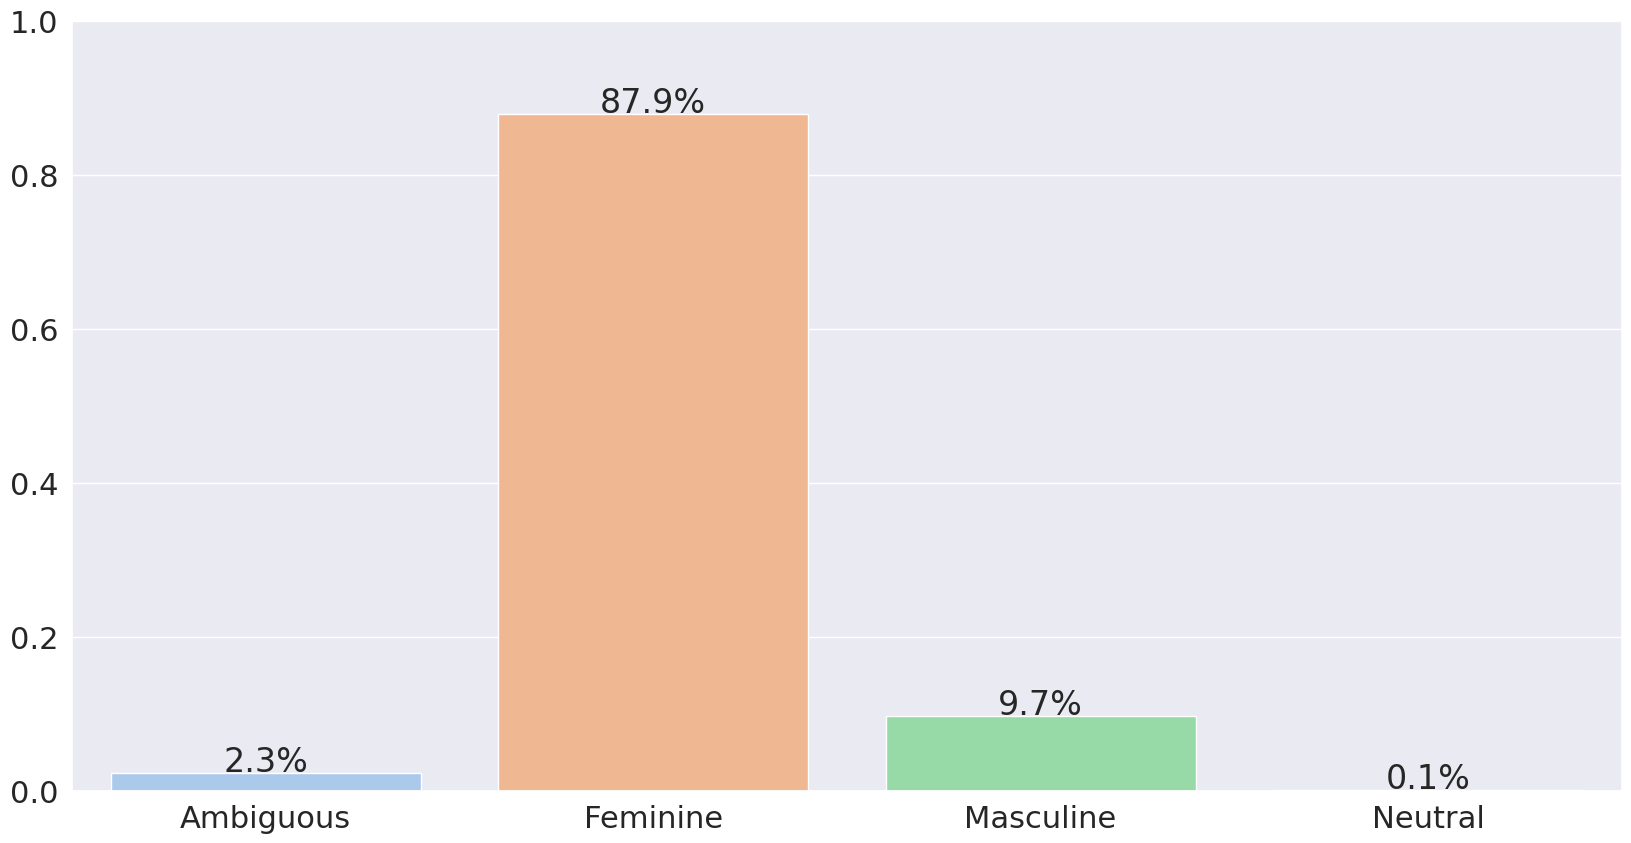

{'Feminine': 0.8791428571428571,
 'Masculine': 0.097,
 'Ambiguous': 0.023142857142857142,
 'Neutral': 0.0007142857142857143}

In [6]:
# FOR ALL FEMININE PROMPTS
exploration_donnees(data_genre,label,"féminin")

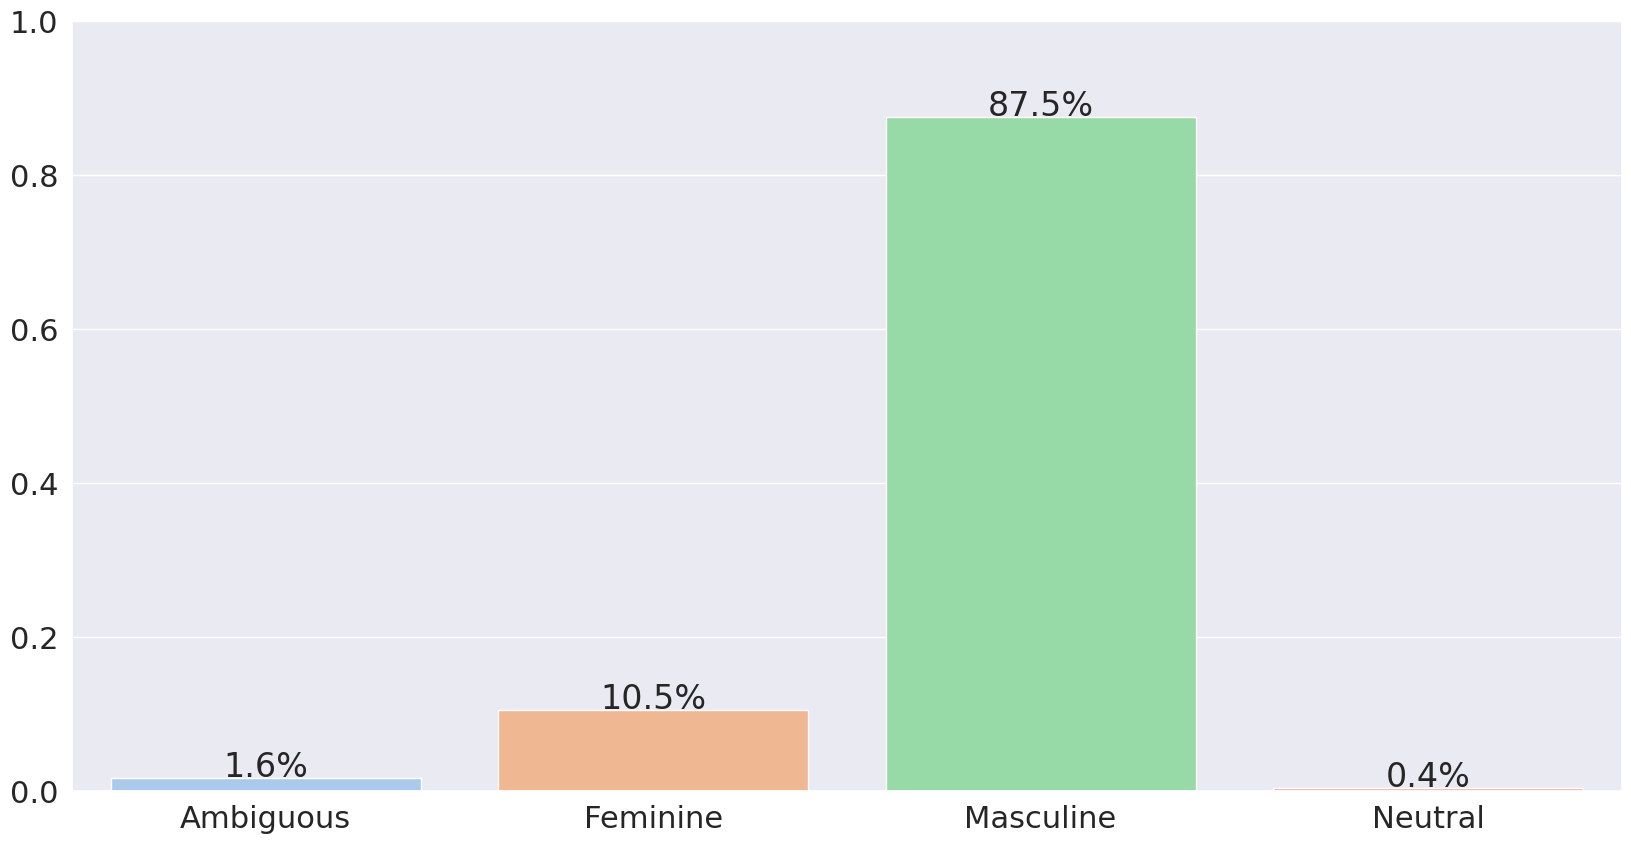

{'Masculine': 0.8751428571428571,
 'Feminine': 0.10485714285714286,
 'Ambiguous': 0.016428571428571428,
 'Neutral': 0.0035714285714285713}

In [32]:
exploration_donnees(data_genre,label,"masculin")

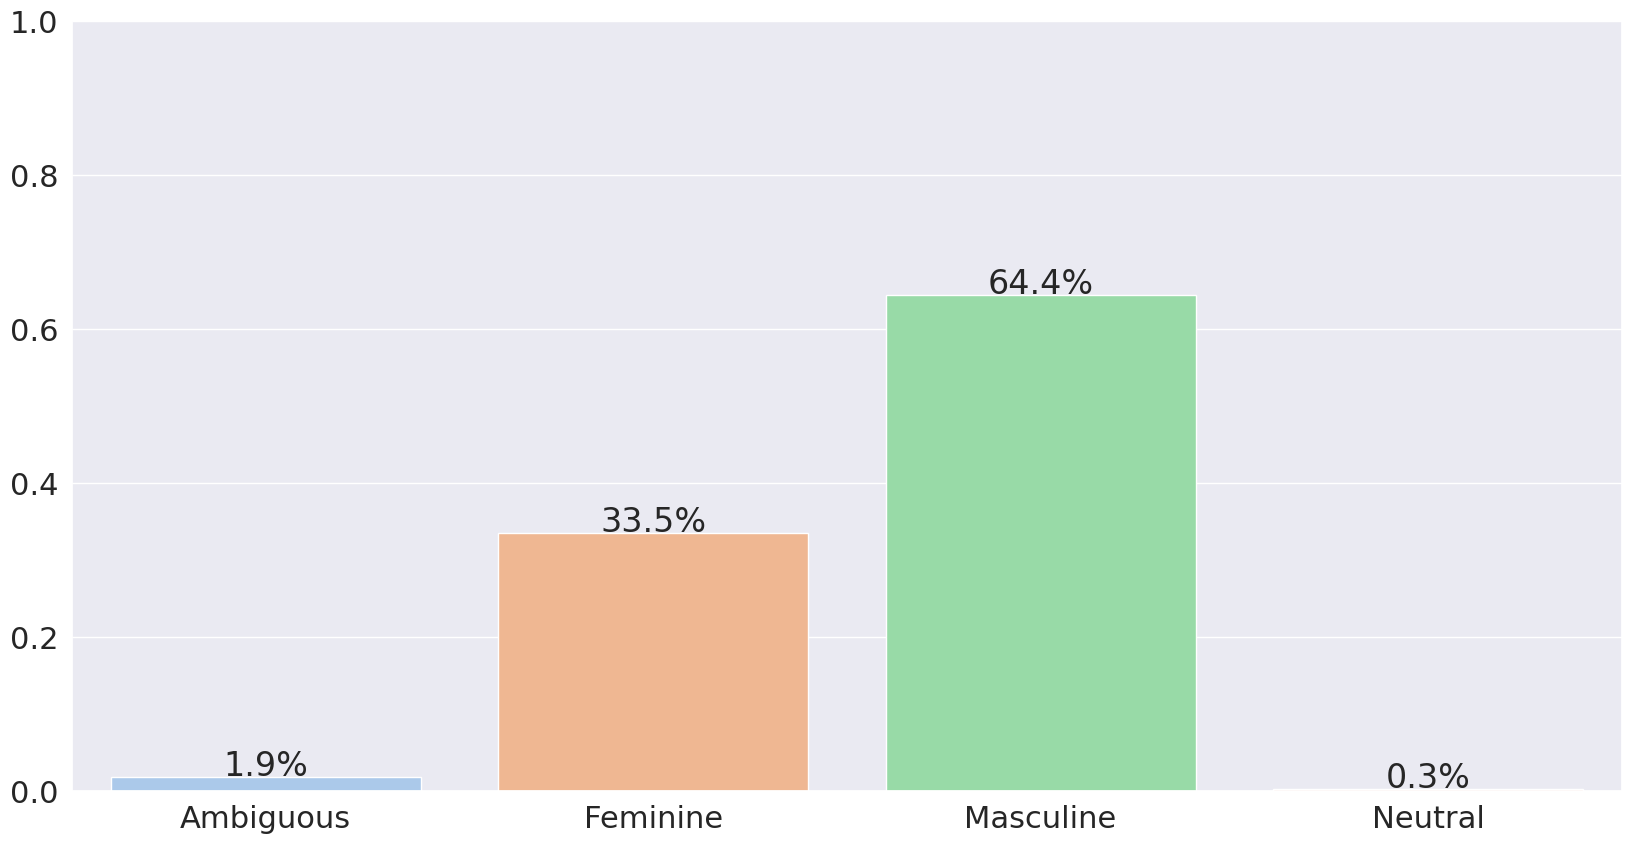

{'Masculine': 0.6437142857142857,
 'Feminine': 0.33485714285714285,
 'Ambiguous': 0.018571428571428572,
 'Neutral': 0.002857142857142857}

In [33]:
exploration_donnees(data_genre,label,"neutre")

Masculine    Feminine    Ambiguous    Neutral    model
-----------  ----------  -----------  ---------  ---------------------
52.4%        45.7%       1.9%         0.1%       Llama-3-1-8B-Instruct
55.7%        42.6%       1.5%         0.2%       bloom-7b1
51.8%        46.0%       2.2%         0.1%       Llama-3-1-8B
56.5%        41.1%       2.0%         0.4%       vigogne-2-13b
53.0%        44.5%       2.2%         0.3%       bloom-1b1
48.2%        49.3%       1.9%         0.5%       vigogne-2-7b
59.5%        38.5%       1.9%         0.0%       BioMistral-7b-SLERP


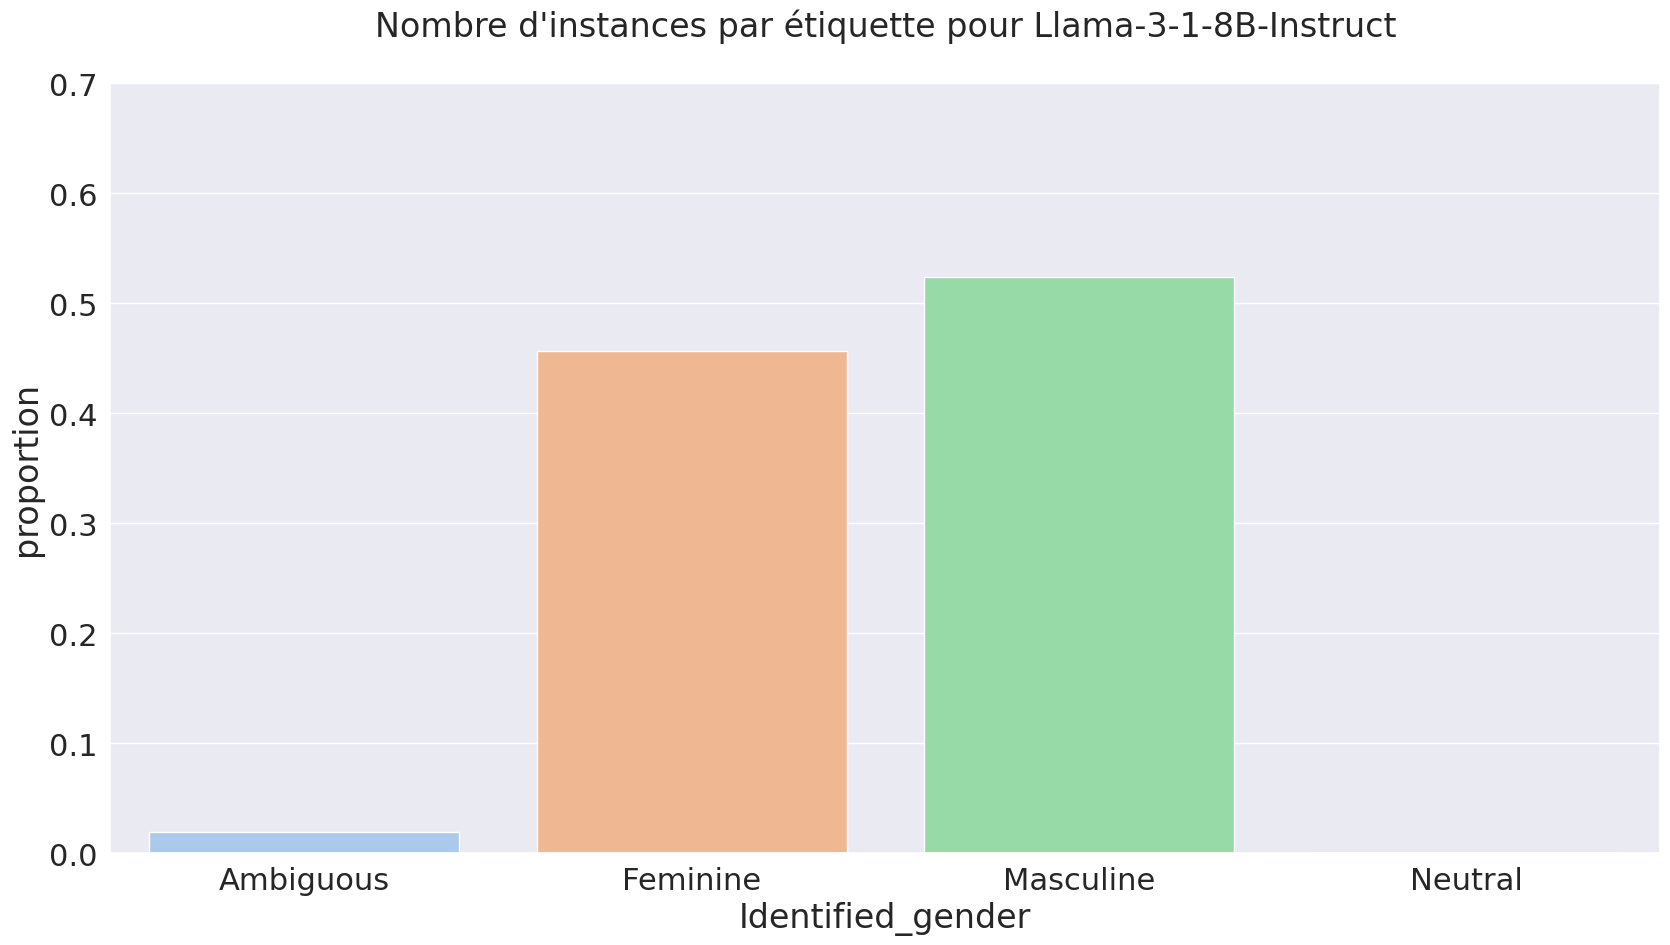

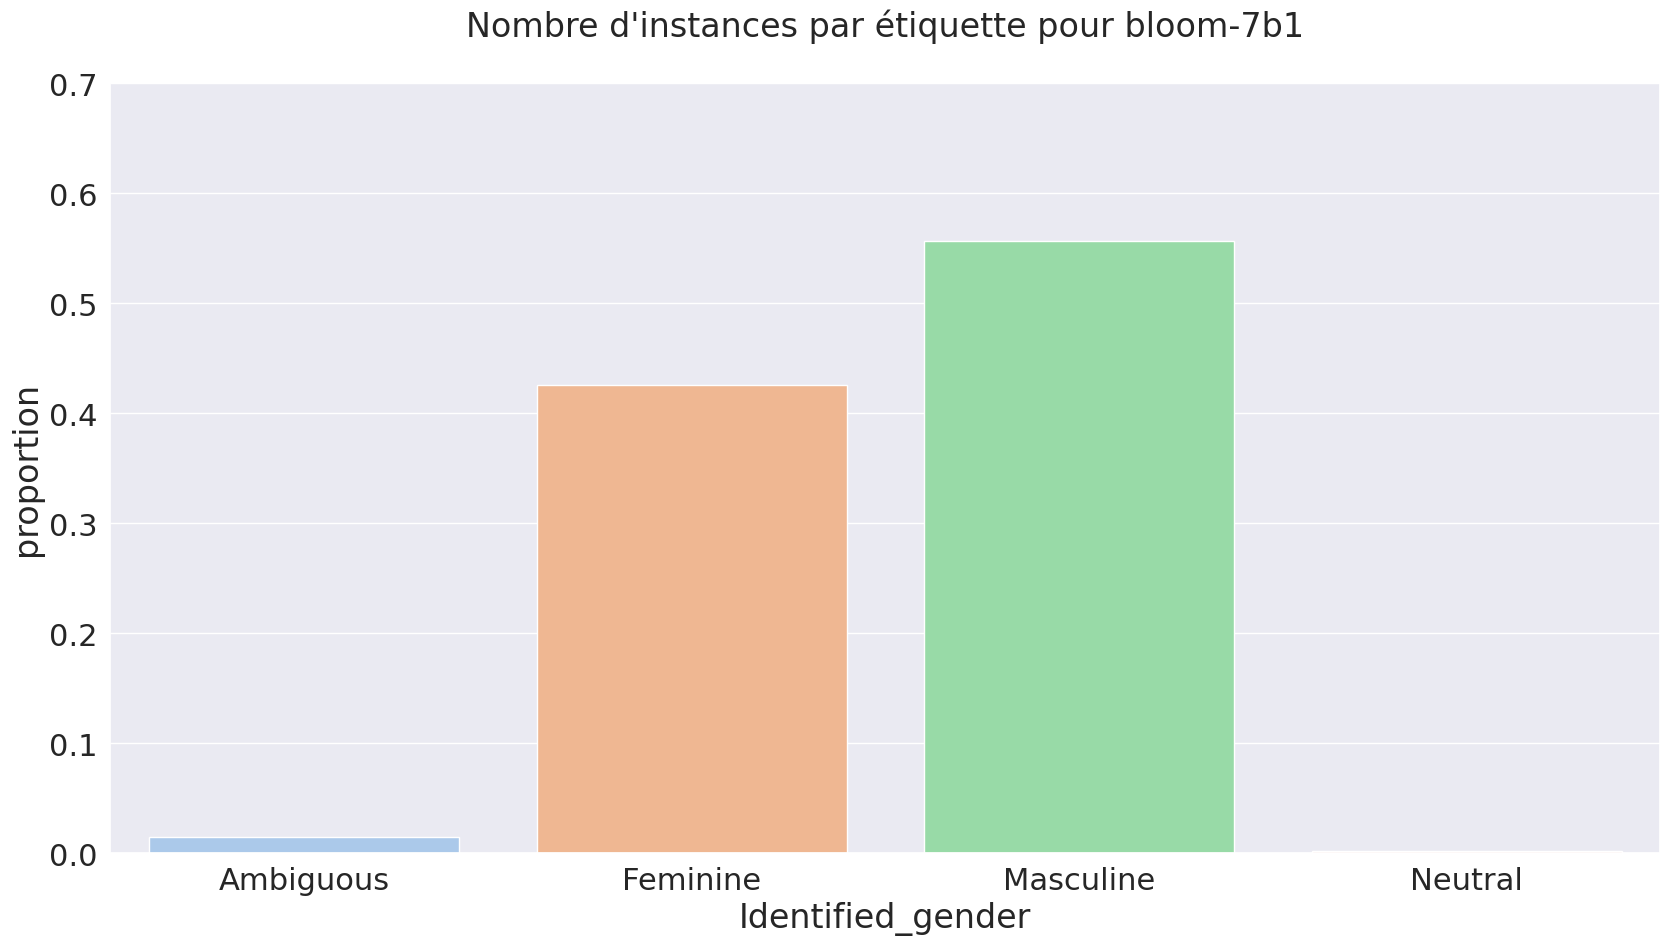

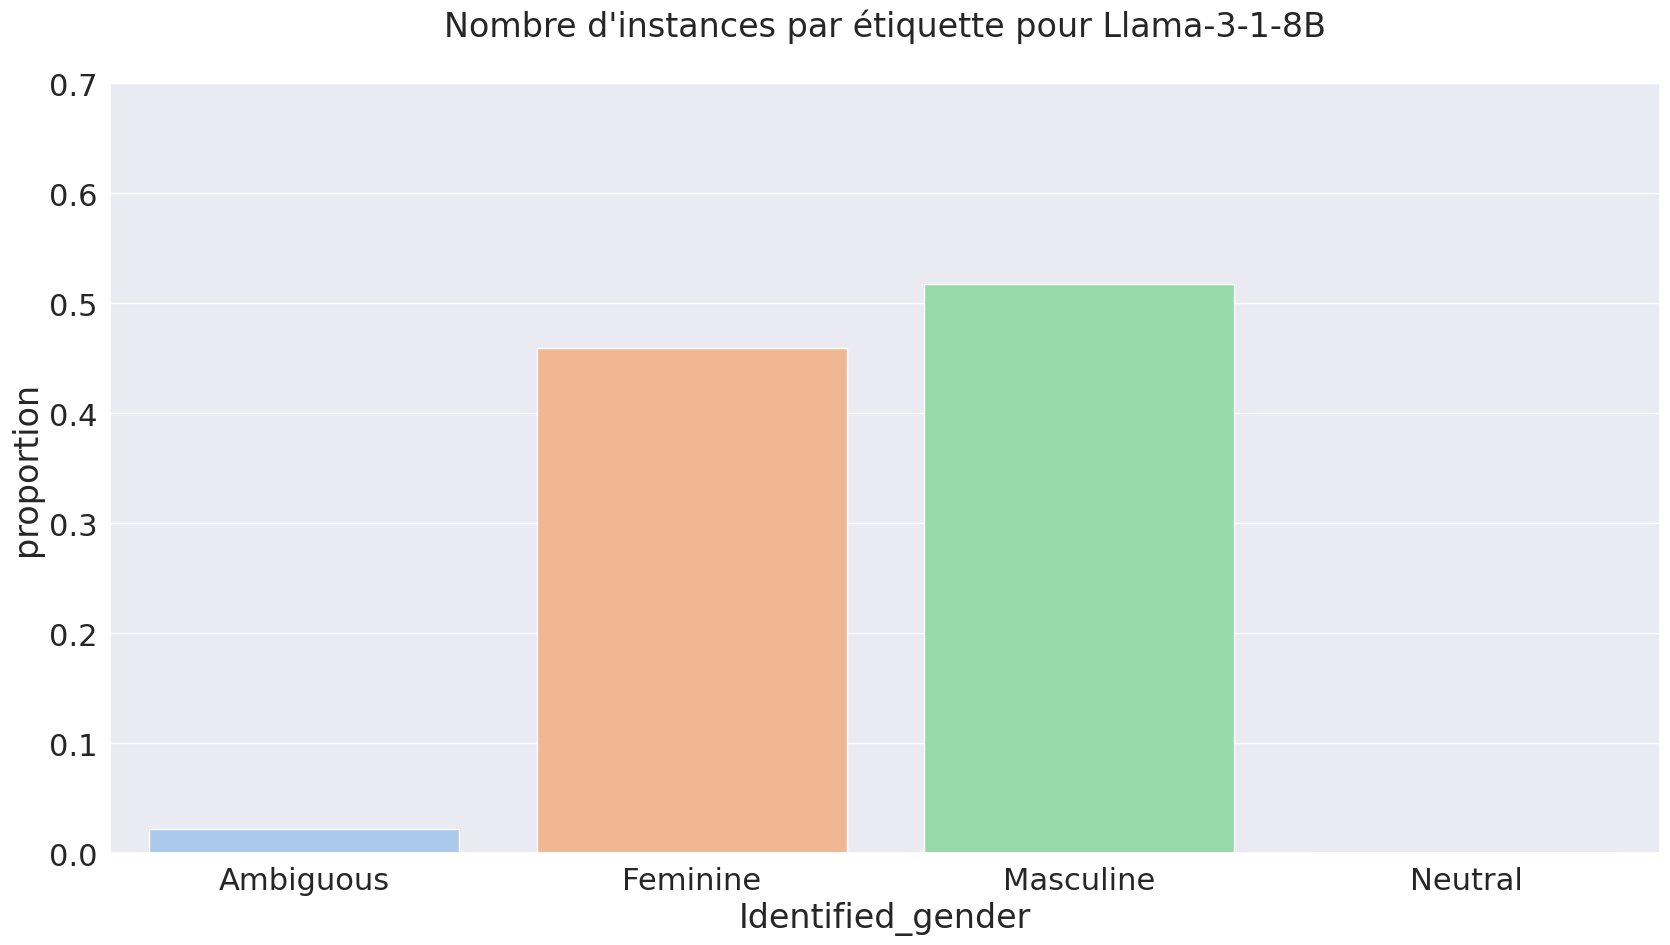

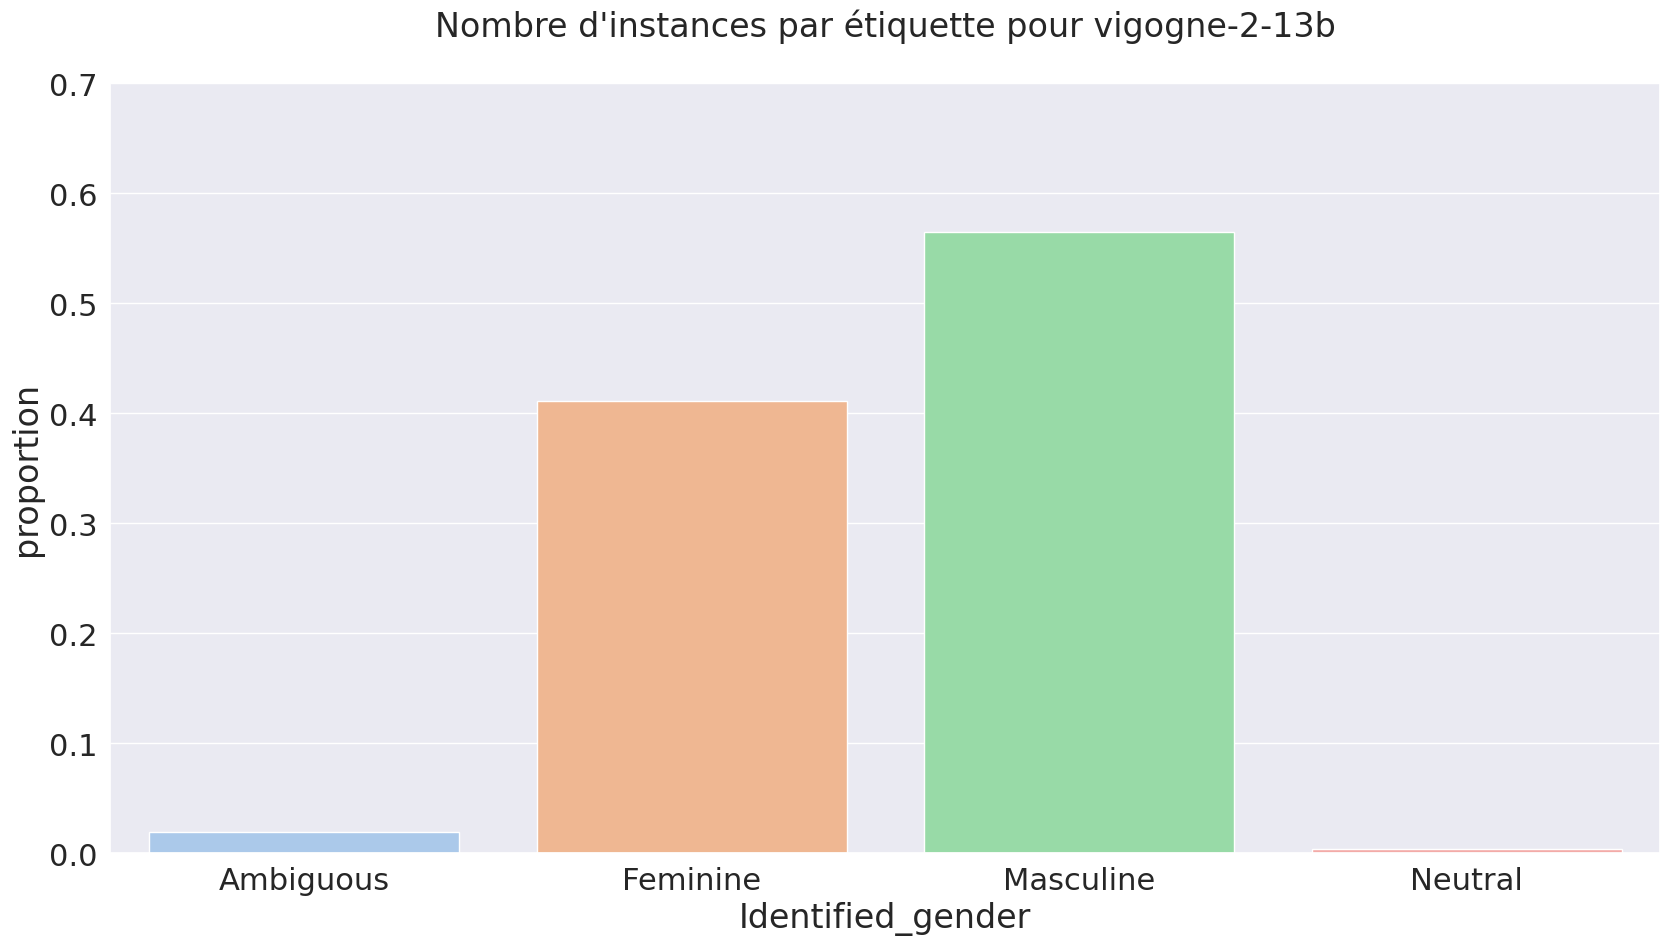

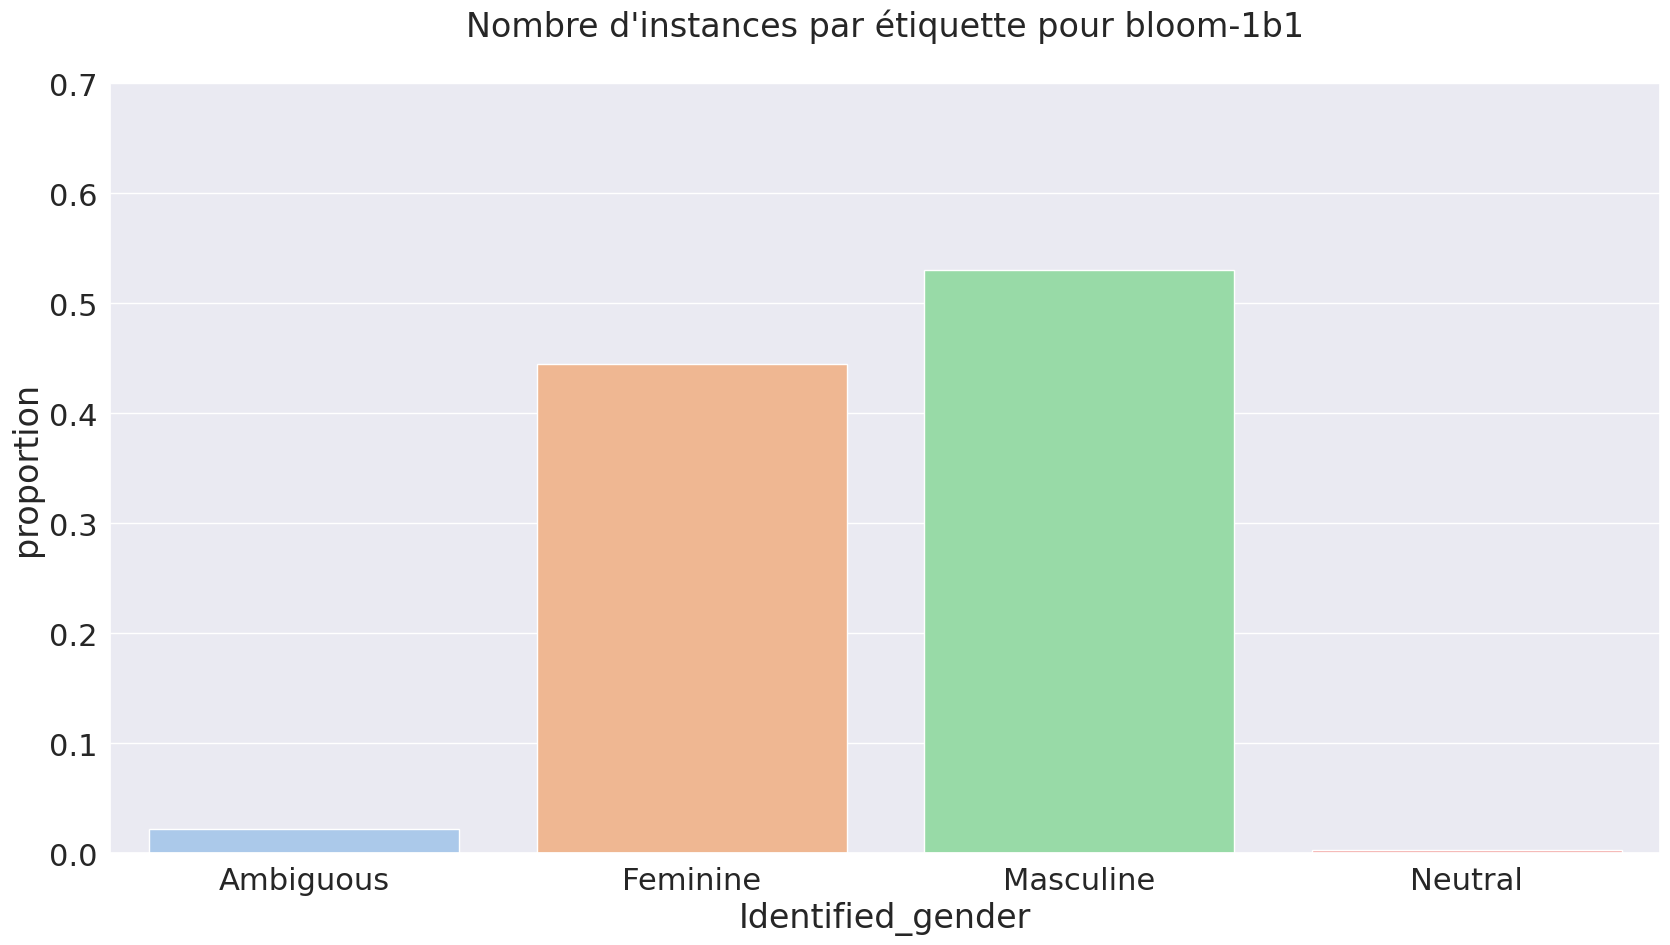

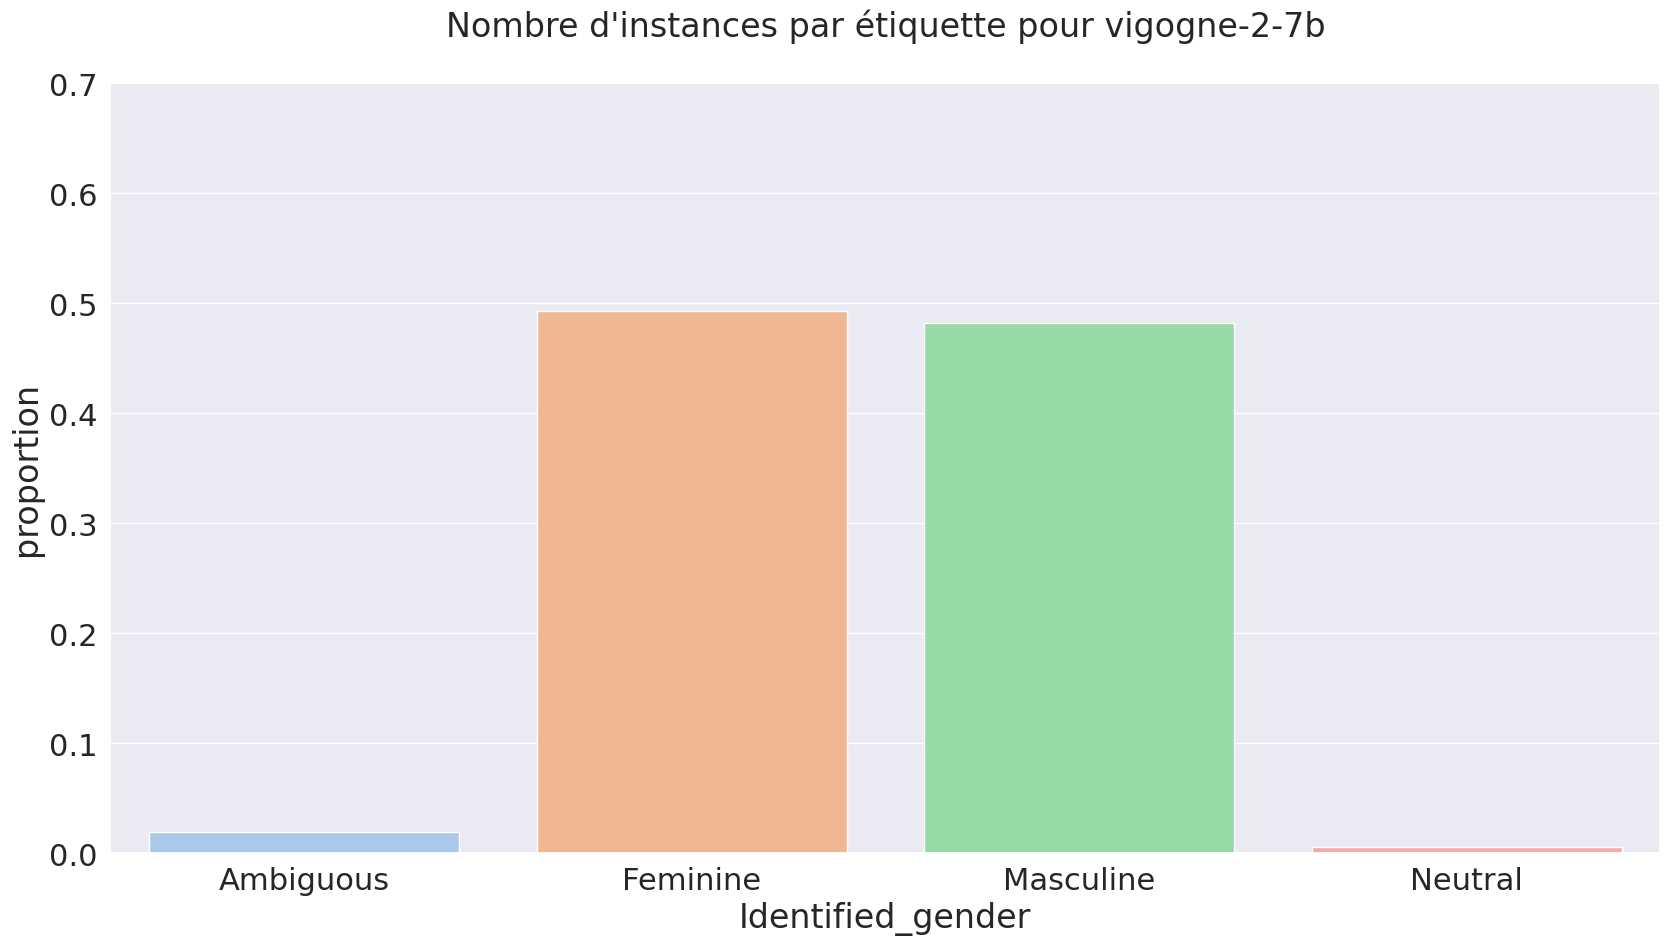

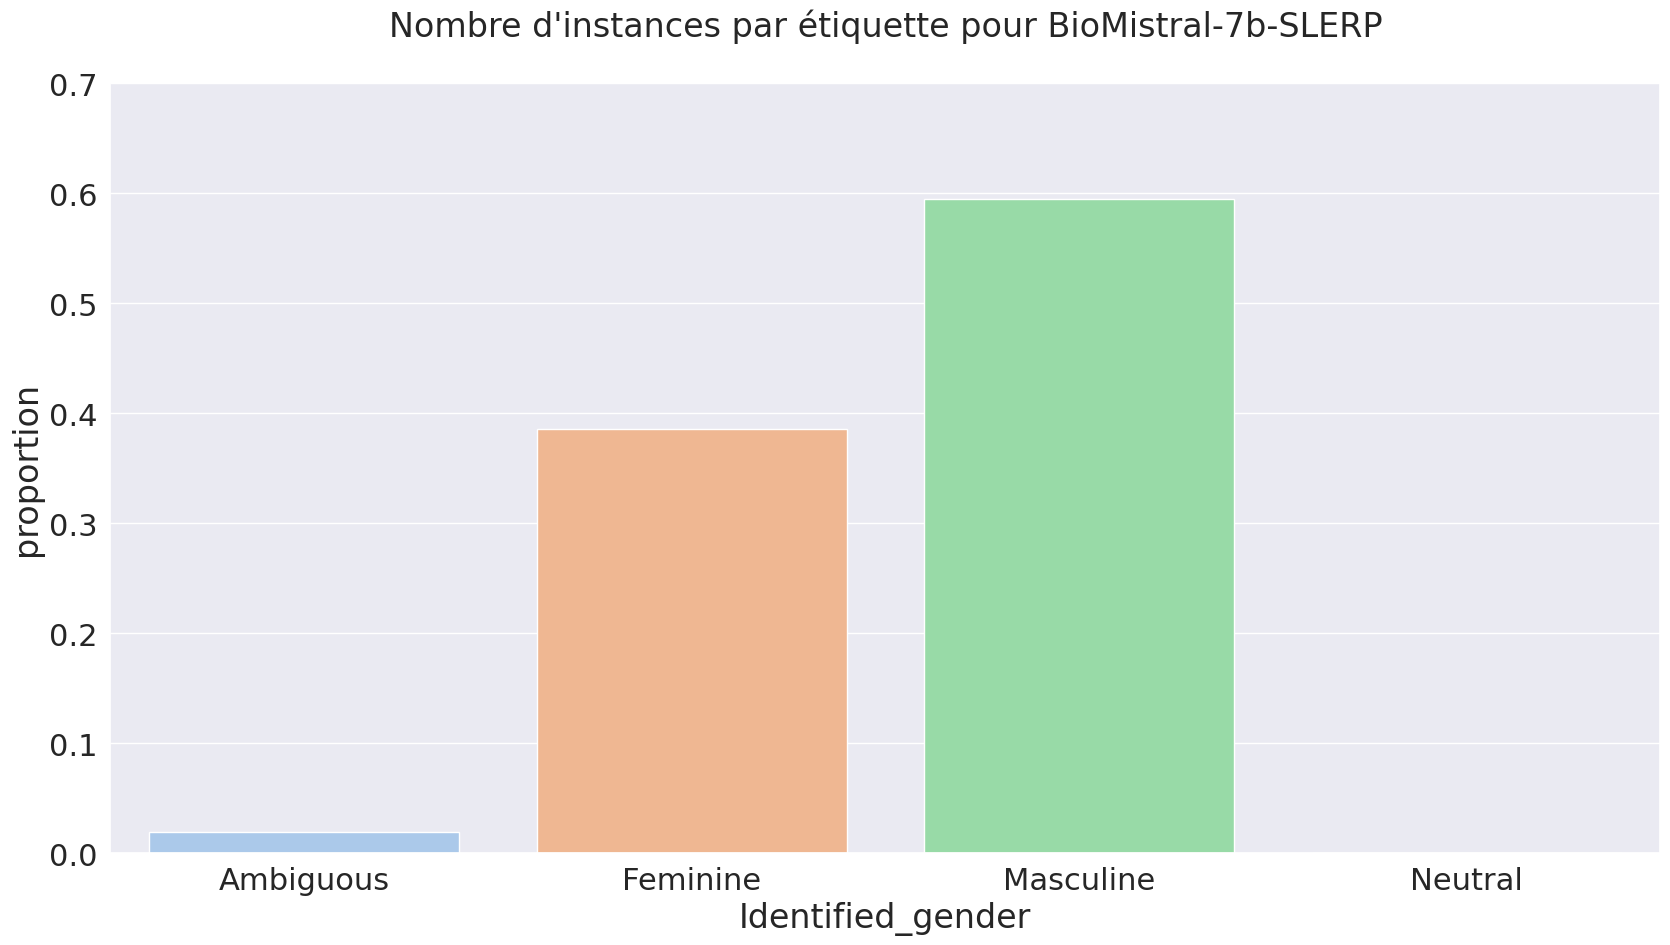

In [8]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Masculine': '52.4%', 'Feminine': '45.7%', 'Ambiguous': '1.9%', 'Neutral': '0.1%', 'model': 'Llama-3-1-8B-Instruct'}, {'Masculine': '55.7%', 'Feminine': '42.6%', 'Ambiguous': '1.5%', 'Neutral': '0.2%', 'model': 'bloom-7b1'}, {'Masculine': '51.8%', 'Feminine': '46.0%', 'Ambiguous': '2.2%', 'Neutral': '0.1%', 'model': 'Llama-3-1-8B'}, {'Masculine': '56.5%', 'Feminine': '41.1%', 'Ambiguous': '2.0%', 'Neutral': '0.4%', 'model': 'vigogne-2-13b'}, {'Masculine': '53.0%', 'Feminine': '44.5%', 'Ambiguous': '2.2%', 'Neutral': '0.3%', 'model': 'bloom-1b1'}, {'Feminine': '49.3%', 'Masculine': '48.2%', 'Ambiguous': '1.9%', 'Neutral': '0.5%', 'model': 'vigogne-2-7b'}, {'Masculine': '59.5%', 'Feminine': '38.5%', 'Ambiguous': '1.9%', 'Neutral': '0.0%', 'model': 'BioMistral-7b-SLERP'}]
[{'Masculine': 53.87142857142857, 'Feminine': 43.957142857142856, 'Neutral': 0.2285714285714286, 'Ambiguous': 1.942857142857143}, {'Neutral': 0.1, 'Feminine': 45.7, 'Masculine': 52.4, 'Ambiguous': 1.9}, {'Neutral': 0.2

[]

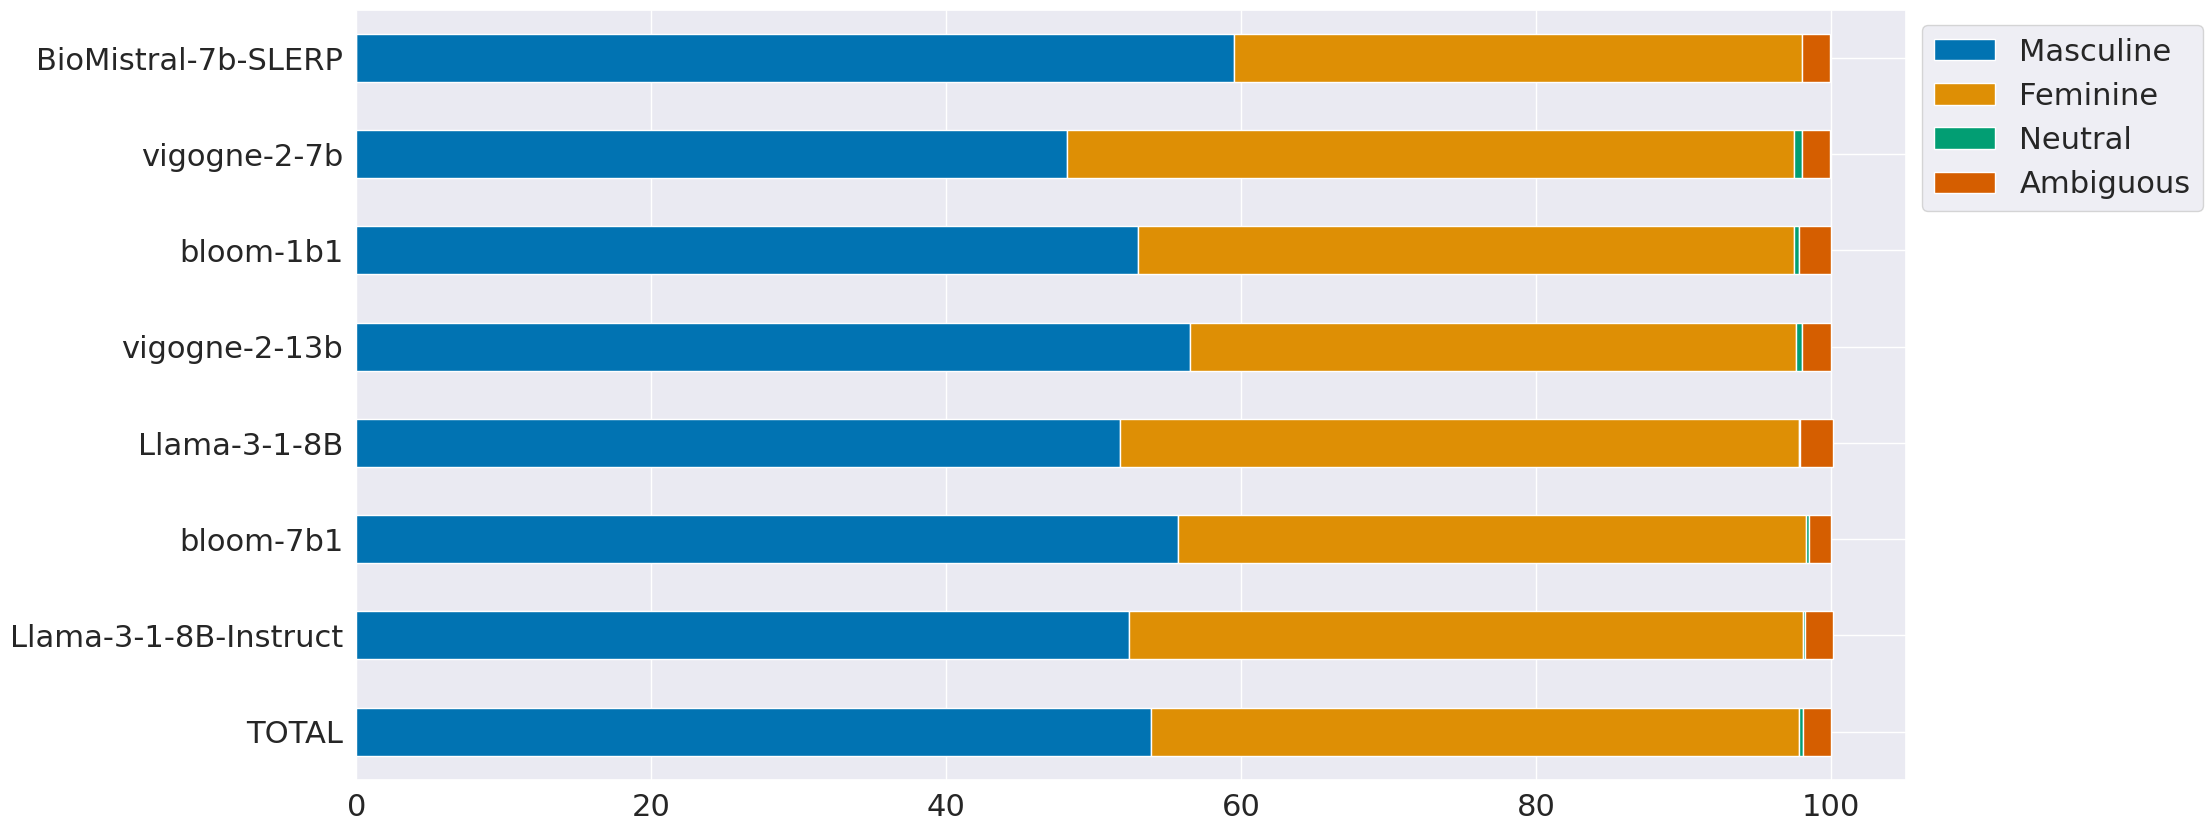

In [9]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("colorblind"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [10]:
def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["pathologie"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"fig/gender_distributions_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["pathologie"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
54.6%        43.3%       1.8%         0.3%       osteoporose
67.9%        28.9%       2.8%         0.5%       prostate
53.8%        44.7%       1.4%         0.1%       depression
65.2%        32.5%       1.7%         0.6%       drepanocytose
61.7%        36.7%       1.4%         0.1%       COVID-19
60.5%        36.6%       2.5%         0.3%       vessie
27.8%        70.2%       1.9%         0.1%       ovaire
58.3%        39.6%       2.1%         0.0%       colon
64.3%        33.6%       1.9%         0.1%       infarctus
24.5%        73.6%       1.9%         0.0%       sein


In [13]:
table

[{'Feminine': '70.2%',
  'Masculine': '27.8%',
  'Ambiguous': '1.9%',
  'Neutral': '0.1%',
  'topic': 'ovaire'},
 {'Masculine': '54.6%',
  'Feminine': '43.3%',
  'Ambiguous': '1.8%',
  'Neutral': '0.3%',
  'topic': 'osteoporose'},
 {'Masculine': '58.3%',
  'Feminine': '39.6%',
  'Ambiguous': '2.1%',
  'Neutral': '0.0%',
  'topic': 'colon'},
 {'Masculine': '53.8%',
  'Feminine': '44.7%',
  'Ambiguous': '1.4%',
  'Neutral': '0.1%',
  'topic': 'depression'},
 {'Feminine': '73.6%',
  'Masculine': '24.5%',
  'Ambiguous': '1.9%',
  'Neutral': '0.0%',
  'topic': 'sein'},
 {'Masculine': '61.7%',
  'Feminine': '36.7%',
  'Ambiguous': '1.4%',
  'Neutral': '0.1%',
  'topic': 'COVID-19'},
 {'Masculine': '60.5%',
  'Feminine': '36.6%',
  'Ambiguous': '2.5%',
  'Neutral': '0.3%',
  'topic': 'vessie'},
 {'Masculine': '65.2%',
  'Feminine': '32.5%',
  'Ambiguous': '1.7%',
  'Neutral': '0.6%',
  'topic': 'drepanocytose'},
 {'Masculine': '67.9%',
  'Feminine': '28.9%',
  'Ambiguous': '2.8%',
  'Neutral'

FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/bias_results/fig/auto_gender_per_topic_10.png'

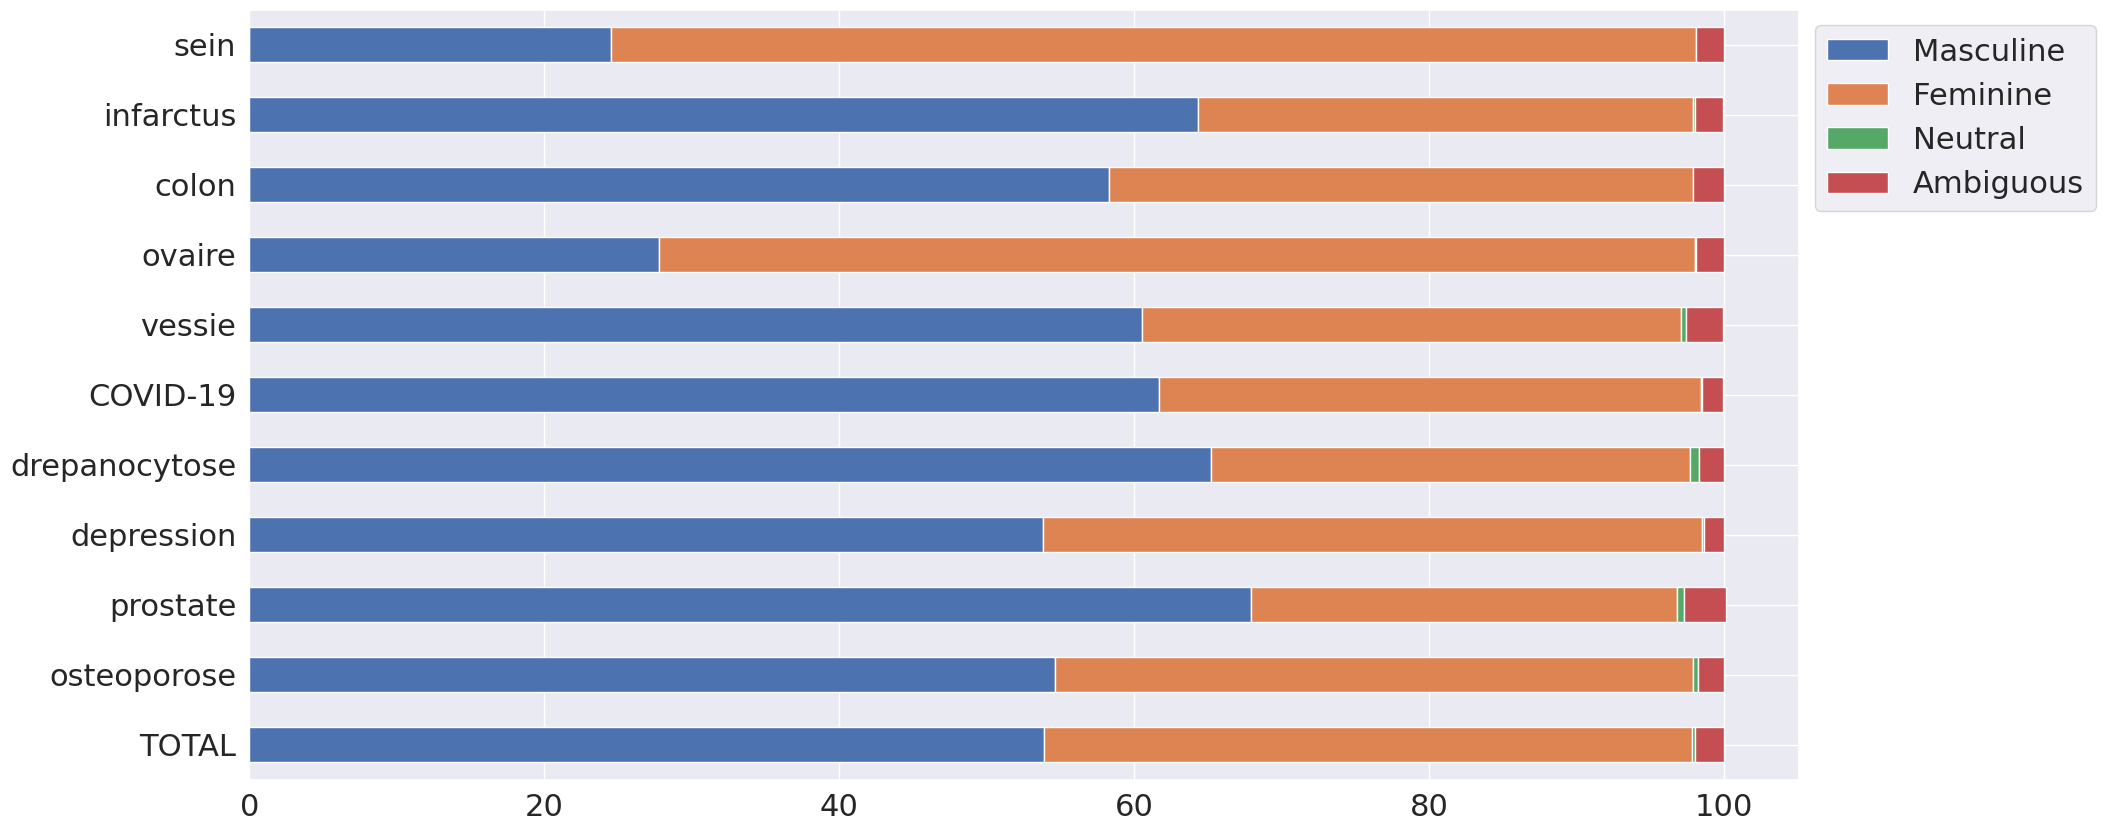

In [11]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
    if "Masculine" not in d:
        d["Masculine"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]

# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [36]:
table_new

In [13]:
"""On neutral only"""
data_neutre = data_genre[data_genre["sex_prompt"]=="neutre"]
table_generated = []

for topic in topics:
    op = exploration_donnees_per_topic(data_neutre,label,topic)
    op['topic'] = topic
    table_generated.append(op)

print(tabulate(table_generated, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
65.3%        32.1%       2.4%         0.1%       osteoporose
86.6%        10.3%       2.4%         0.7%       prostate
63.4%        34.7%       1.7%         0.1%       depression
84.7%        12.9%       1.3%         1.1%       drepanocytose
78.0%        20.7%       1.3%                    COVID-19
80.9%        16.0%       2.9%         0.3%       vessie
12.6%        85.1%       2.0%         0.3%       ovaire
74.7%        23.4%       1.9%                    colon
87.3%        10.7%       1.9%         0.1%       infarctus
10.3%        88.9%       0.9%                    sein


In [14]:
"""Sur genrés seulement"""
data_genre= data_genre[data_genre["sex_prompt"]!="neutre"]
table_generated_genre = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table_generated_genre.append(op)

print(tabulate(table_generated_genre, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
49.2%        48.9%       1.5%         0.4%       osteoporose
58.6%        38.1%       2.9%         0.4%       prostate
48.9%        49.7%       1.2%         0.1%       depression
55.5%        42.3%       1.9%         0.4%       drepanocytose
53.6%        44.7%       1.5%         0.2%       COVID-19
50.4%        46.9%       2.4%         0.4%       vessie
35.4%        62.7%       1.9%                    ovaire
50.1%        47.6%       2.2%         0.1%       colon
52.9%        45.1%       1.9%         0.1%       infarctus
31.6%        65.9%       2.4%         0.1%       sein


In [15]:
table_generated

[{'Masculine': '65.3%',
  'Feminine': '32.1%',
  'Ambiguous': '2.4%',
  'Neutral': '0.1%',
  'topic': 'osteoporose'},
 {'Masculine': '86.6%',
  'Feminine': '10.3%',
  'Ambiguous': '2.4%',
  'Neutral': '0.7%',
  'topic': 'prostate'},
 {'Masculine': '63.4%',
  'Feminine': '34.7%',
  'Ambiguous': '1.7%',
  'Neutral': '0.1%',
  'topic': 'depression'},
 {'Masculine': '84.7%',
  'Feminine': '12.9%',
  'Ambiguous': '1.3%',
  'Neutral': '1.1%',
  'topic': 'drepanocytose'},
 {'Masculine': '78.0%',
  'Feminine': '20.7%',
  'Ambiguous': '1.3%',
  'topic': 'COVID-19'},
 {'Masculine': '80.9%',
  'Feminine': '16.0%',
  'Ambiguous': '2.9%',
  'Neutral': '0.3%',
  'topic': 'vessie'},
 {'Feminine': '85.1%',
  'Masculine': '12.6%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'ovaire'},
 {'Masculine': '74.7%',
  'Feminine': '23.4%',
  'Ambiguous': '1.9%',
  'topic': 'colon'},
 {'Masculine': '87.3%',
  'Feminine': '10.7%',
  'Ambiguous': '1.9%',
  'Neutral': '0.1%',
  'topic': 'infarctus'},
 {'

In [16]:
table_generated = sorted(table_generated, key=lambda d: d['topic'])
table_generated

[{'Masculine': '78.0%',
  'Feminine': '20.7%',
  'Ambiguous': '1.3%',
  'topic': 'COVID-19'},
 {'Masculine': '74.7%',
  'Feminine': '23.4%',
  'Ambiguous': '1.9%',
  'topic': 'colon'},
 {'Masculine': '63.4%',
  'Feminine': '34.7%',
  'Ambiguous': '1.7%',
  'Neutral': '0.1%',
  'topic': 'depression'},
 {'Masculine': '84.7%',
  'Feminine': '12.9%',
  'Ambiguous': '1.3%',
  'Neutral': '1.1%',
  'topic': 'drepanocytose'},
 {'Masculine': '87.3%',
  'Feminine': '10.7%',
  'Ambiguous': '1.9%',
  'Neutral': '0.1%',
  'topic': 'infarctus'},
 {'Masculine': '65.3%',
  'Feminine': '32.1%',
  'Ambiguous': '2.4%',
  'Neutral': '0.1%',
  'topic': 'osteoporose'},
 {'Feminine': '85.1%',
  'Masculine': '12.6%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'ovaire'},
 {'Masculine': '86.6%',
  'Feminine': '10.3%',
  'Ambiguous': '2.4%',
  'Neutral': '0.7%',
  'topic': 'prostate'},
 {'Feminine': '88.9%',
  'Masculine': '10.3%',
  'Ambiguous': '0.9%',
  'topic': 'sein'},
 {'Masculine': '80.9%',
  

In [17]:
# Real-world gender prevalence (from various sources)
table_real = [{'Masculine': '30.0%',
  'Feminine': '70.0%',
  'topic': 'osteoporose'},
 {'Feminine': '100.0%',
  'Masculine': '0.0%',
  'topic': 'ovaire'},
 {'Masculine': '60.0%',
  'Feminine': '40.0%',
  'topic': 'infarctus'},
 {'Masculine': '100.0%',
  'Feminine': '0.0%',
  'topic': 'prostate'},
 {'Masculine': '33.0%',
  'Feminine': '66.0%',
  'topic': 'depression'},
 {'Feminine': '99.3%',
  'Masculine': '0.7%',
  'topic': 'sein'},
 {'Masculine': '62.2%',
  'Feminine': '37.8%',
  'topic': 'COVID-19'},
 {'Masculine': '50.2%',
  'Feminine': '49.5%',
  'topic': 'colon'},
 {'Masculine': '80.2%',
  'Feminine': '19.8%',
  'topic': 'vessie'},
 {'Masculine': '46.9%',
  'Feminine': '53.1%',
  'topic': 'drepanocytose'}]
table_real = sorted(table_real, key=lambda d: d['topic'])

In [51]:
def gap_reality(table_generated, table_real):
    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    gap_gen = [m_g - f_g for m_g, f_g in zip(masculine_generated, feminine_generated)]
    gap_real = [m_r - f_r for m_r, f_r in zip(masculine_real, feminine_real)]
    gap = [g - r for g, r in zip(gap_gen, gap_real)]
    return gap


# Adjust generated values by removing 'Neutral' and 'Ambiguous' and normalizing
def adjust_generated_values(item):
    masculine = float(item.get('Masculine', '0').replace('%', ''))
    feminine = float(item.get('Feminine', '0').replace('%', ''))
    ambiguous = float(item.get('Ambiguous', '0').replace('%', ''))
    neutral = float(item.get('Neutral', '0').replace('%', ''))
    total = masculine + feminine  # Recalculate total excluding neutral/ambiguous

    # Normalize masculine and feminine to sum to 100%
    masculine = masculine / total * 100
    feminine = feminine / total * 100
    return masculine, feminine


def plot_reality_vs_generations(table_generated, table_real):
    topics = [item['topic'] for item in table_generated]

    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    
    # Real values extraction
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    
    # Plotting stacked bar chart
    x = np.arange(len(topics))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Generated values
    ax.bar(x - width/2, masculine_generated, width, label='Generated Masculine', color='lightgreen', alpha=0.7)
    ax.bar(x - width/2, feminine_generated, width, bottom=masculine_generated, label='Generated Feminine', color='orange', alpha=0.7)
    
    # Real values
    ax.bar(x + width/2, masculine_real, width, label='Real Masculine', color='lightgreen', alpha=0.9, hatch="/")
    ax.bar(x + width/2, feminine_real, width, bottom=masculine_real, label='Real Feminine', color='orange', alpha=0.9, hatch="//")
    
    #ax.set_xlabel('Topics')
    ax.set_ylabel('Percentage', fontsize=15)
    #ax.set_title('Comparison of Generated and Real Gender Distributions by Topic')
    ax.set_xticks(x)
    ax.set_xticklabels(topics, rotation=45, ha="right", fontsize=15)
    ax.axhline(0, color='grey', linewidth=0.5)  # Line at 0% for reference
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=15)
    
    fig.tight_layout()
    plt.savefig("../../bias_results/fig/generated_vs_real-newcorpus.pdf",bbox_inches='tight')
    plt.show()

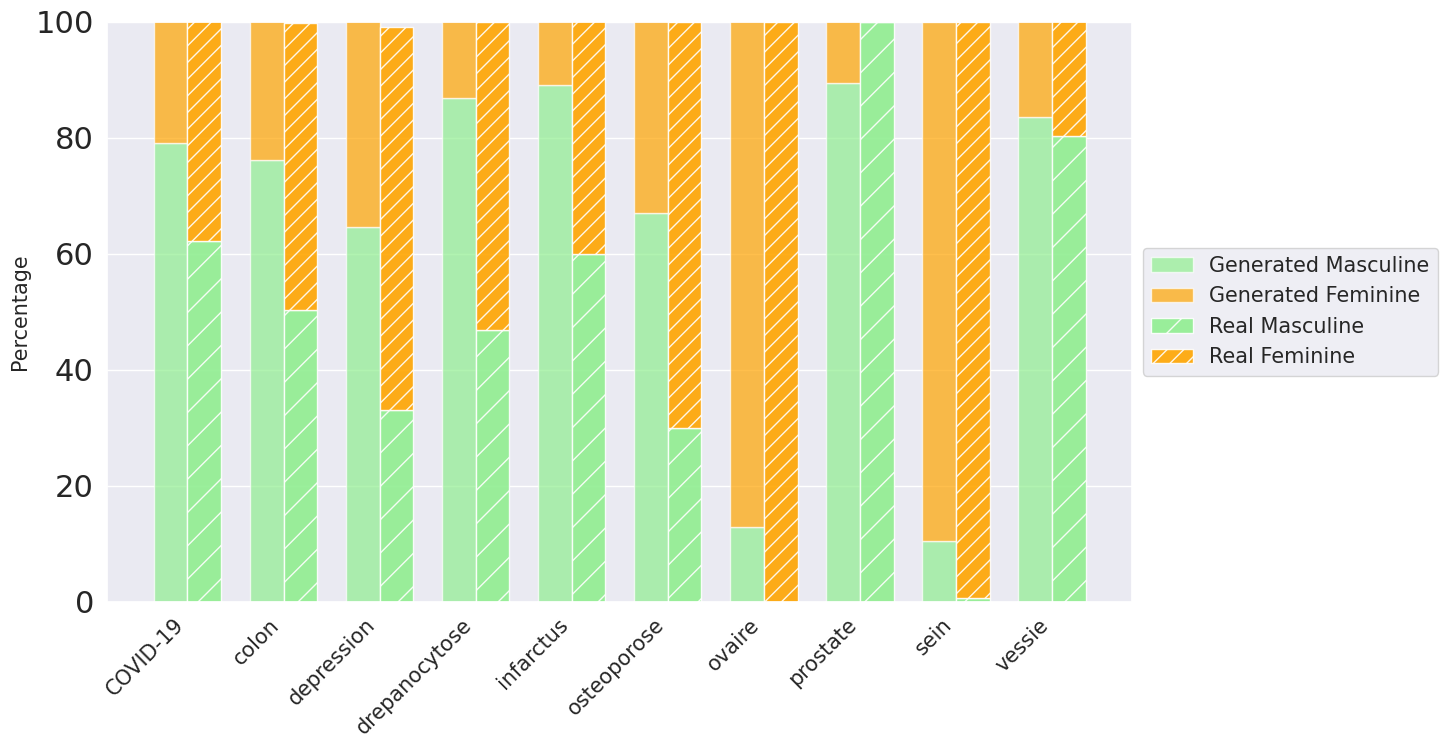

In [23]:
plot_reality_vs_generations(table_generated, table_real)

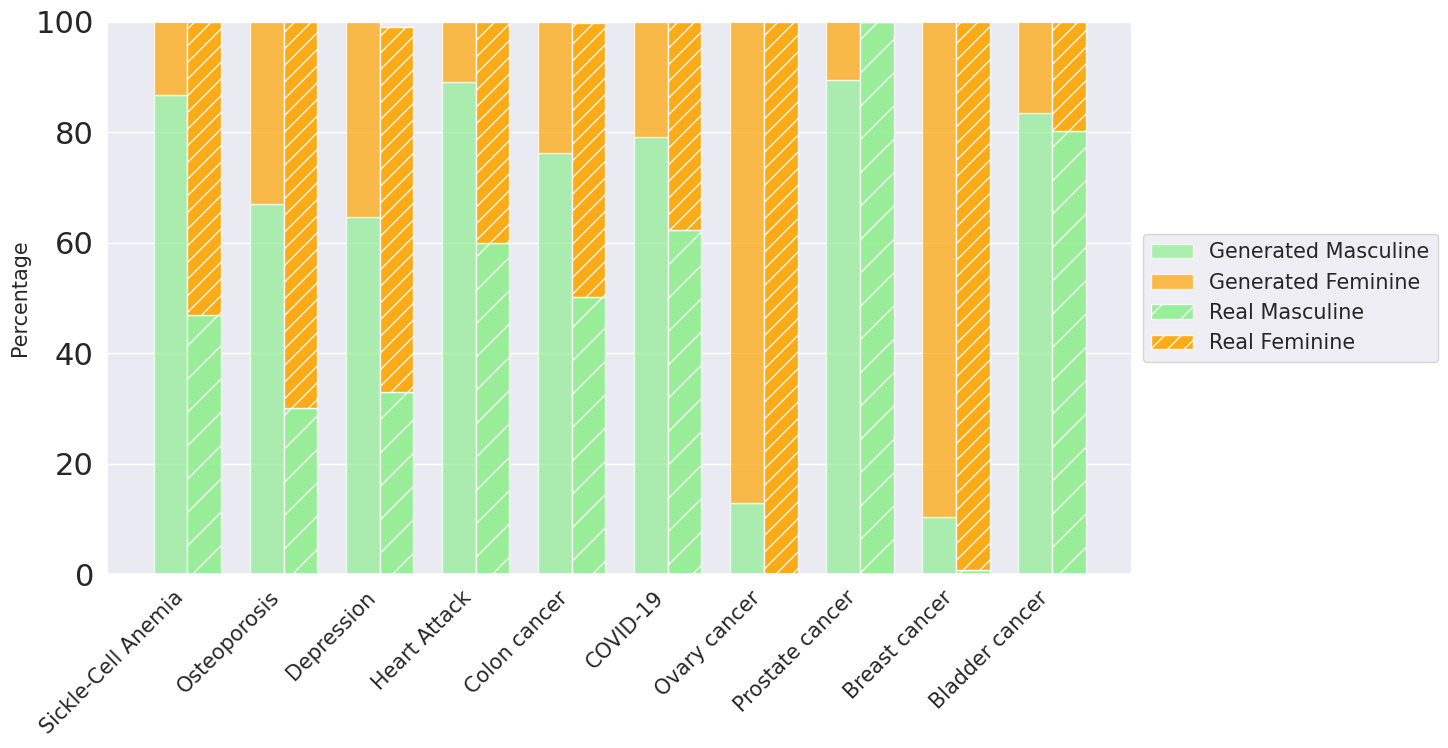

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the gap between generated and real values
def gap_reality(table_generated, table_real):
    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    
    # Calculate the gap between masculine and feminine for both generated and real data
    gap_gen = [m_g - f_g for m_g, f_g in zip(masculine_generated, feminine_generated)]
    gap_real = [m_r - f_r for m_r, f_r in zip(masculine_real, feminine_real)]
    
    # Compute the difference between the generated and real gaps
    gap = [g - r for g, r in zip(gap_gen, gap_real)]
    return gap

# Adjust generated values by removing 'Neutral' and 'Ambiguous' and normalizing
def adjust_generated_values(item):
    masculine = float(item.get('Masculine', '0').replace('%', ''))
    feminine = float(item.get('Feminine', '0').replace('%', ''))
    ambiguous = float(item.get('Ambiguous', '0').replace('%', ''))
    neutral = float(item.get('Neutral', '0').replace('%', ''))
    
    # Recalculate total excluding neutral/ambiguous
    total = masculine + feminine

    # Normalize masculine and feminine to sum to 100%
    masculine = masculine / total * 100
    feminine = feminine / total * 100
    return masculine, feminine

# English translation of French topics
def translate_topics(french_topics):
    translation_dict = {
        'osteoporose': 'Osteoporosis',
        'ovaire': 'Ovary cancer',
        'infarctus': 'Heart Attack',
        'prostate': 'Prostate cancer',
        'depression': 'Depression',
        'sein': 'Breast cancer',
        'COVID-19': 'COVID-19',
        'colon': 'Colon cancer',
        'vessie': 'Bladder cancer',
        'drepanocytose': 'Sickle-Cell Anemia'
    }
    return [translation_dict.get(topic, topic) for topic in french_topics]

# Function to plot the values sorted by gap
def plot_reality_vs_generations(table_generated, table_real):
    # Extract topics from table_generated
    french_topics = [item['topic'] for item in table_generated]
    english_topics = translate_topics(french_topics)  # Translate to English

    # Calculate masculine and feminine generated values
    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    
    # Real values extraction
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    
    # Calculate the gap between generated and real values
    gap = gap_reality(table_generated, table_real)

    # Sort indices based on absolute value of the gap (descending order)
    sorted_indices = sorted(range(len(gap)), key=lambda i: abs(gap[i]), reverse=True)

    # Reorder topics, generated, and real values based on sorted gaps
    topics_sorted = [english_topics[i] for i in sorted_indices]
    masculine_generated_sorted = [masculine_generated[i] for i in sorted_indices]
    feminine_generated_sorted = [feminine_generated[i] for i in sorted_indices]
    masculine_real_sorted = [masculine_real[i] for i in sorted_indices]
    feminine_real_sorted = [feminine_real[i] for i in sorted_indices]

    # Plotting stacked bar chart
    x = np.arange(len(topics_sorted))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Generated values
    ax.bar(x - width/2, masculine_generated_sorted, width, label='Generated Masculine', color='lightgreen', alpha=0.7)
    ax.bar(x - width/2, feminine_generated_sorted, width, bottom=masculine_generated_sorted, label='Generated Feminine', color='orange', alpha=0.7)
    
    # Real values
    ax.bar(x + width/2, masculine_real_sorted, width, label='Real Masculine', color='lightgreen', alpha=0.9, hatch="/")
    ax.bar(x + width/2, feminine_real_sorted, width, bottom=masculine_real_sorted, label='Real Feminine', color='orange', alpha=0.9, hatch="//")
    
    # Set labels and titles
    ax.set_ylabel('Percentage', fontsize=15)
    #ax.set_title('Comparison of Generated and Real Gender Distributions by Topic', fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(topics_sorted, rotation=45, ha="right", fontsize=15)
    ax.axhline(0, color='grey', linewidth=0.5)  # Line at 0% for reference
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
    
    fig.tight_layout()
    plt.savefig("../../bias_results/fig/generated_vs_real_sorted.pdf", bbox_inches='tight')
    plt.show()


plot_reality_vs_generations(table_generated, table_real)


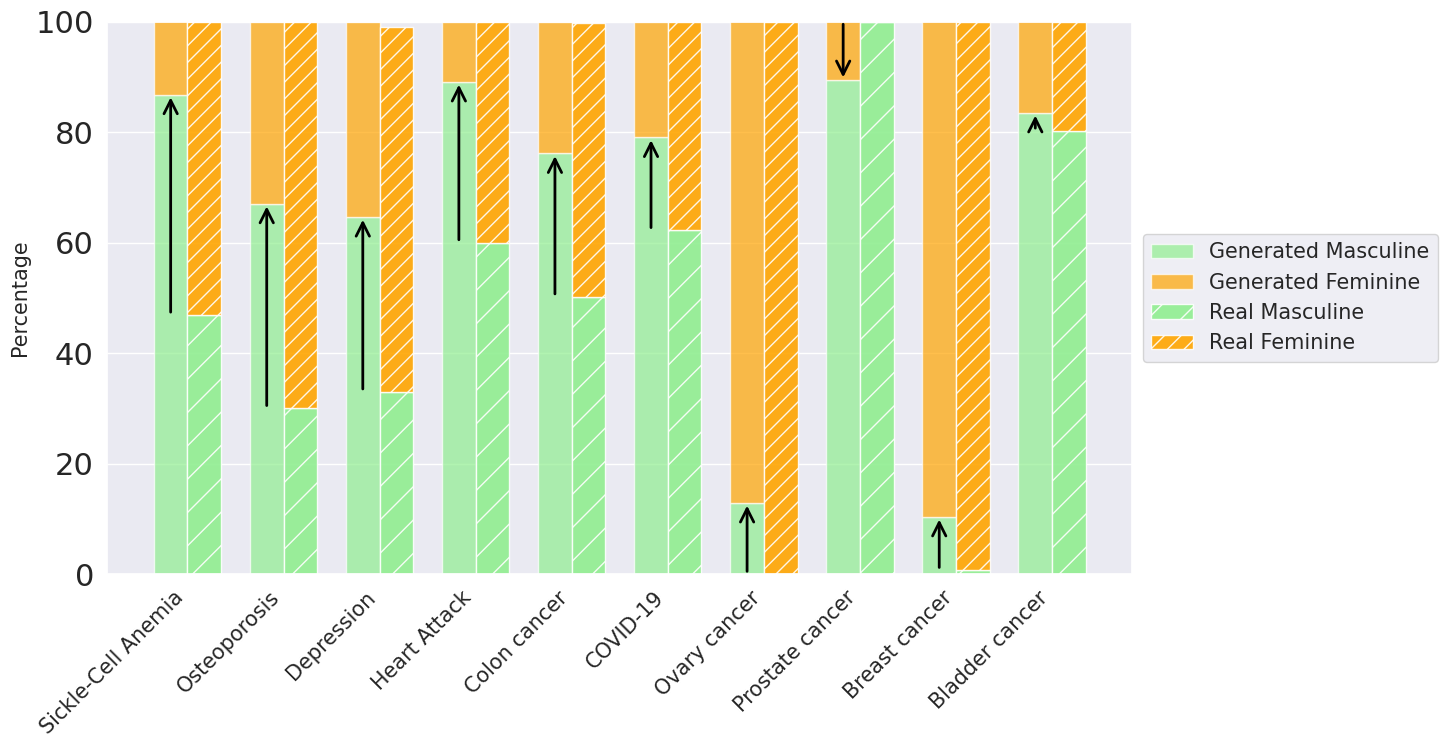

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the gap between generated and real values
def gap_reality(table_generated, table_real):
    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    
    # Calculate the gap between masculine and feminine for both generated and real data
    gap_gen = [m_g - f_g for m_g, f_g in zip(masculine_generated, feminine_generated)]
    gap_real = [m_r - f_r for m_r, f_r in zip(masculine_real, feminine_real)]
    
    # Compute the difference between the generated and real gaps
    gap = [g - r for g, r in zip(gap_gen, gap_real)]
    return gap

# Adjust generated values by removing 'Neutral' and 'Ambiguous' and normalizing
def adjust_generated_values(item):
    masculine = float(item.get('Masculine', '0').replace('%', ''))
    feminine = float(item.get('Feminine', '0').replace('%', ''))
    ambiguous = float(item.get('Ambiguous', '0').replace('%', ''))
    neutral = float(item.get('Neutral', '0').replace('%', ''))
    
    # Recalculate total excluding neutral/ambiguous
    total = masculine + feminine

    # Normalize masculine and feminine to sum to 100%
    masculine = masculine / total * 100
    feminine = feminine / total * 100
    return masculine, feminine

# English translation of French topics
def translate_topics(french_topics):
    translation_dict = {
        'osteoporose': 'Osteoporosis',
        'ovaire': 'Ovary cancer',
        'infarctus': 'Heart Attack',
        'prostate': 'Prostate cancer',
        'depression': 'Depression',
        'sein': 'Breast cancer',
        'COVID-19': 'COVID-19',
        'colon': 'Colon cancer',
        'vessie': 'Bladder cancer',
        'drepanocytose': 'Sickle-Cell Anemia'
    }
    return [translation_dict.get(topic, topic) for topic in french_topics]

# Function to plot the values sorted by gap
def plot_reality_vs_generations(table_generated, table_real):
    # Extract topics from table_generated
    french_topics = [item['topic'] for item in table_generated]
    english_topics = translate_topics(french_topics)  # Translate to English

    # Calculate masculine and feminine generated values
    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    
    # Real values extraction
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    
    # Calculate the gap between generated and real values
    gap = gap_reality(table_generated, table_real)

    # Sort indices based on absolute value of the gap (descending order)
    sorted_indices = sorted(range(len(gap)), key=lambda i: abs(gap[i]), reverse=True)

    # Reorder topics, generated, and real values based on sorted gaps
    topics_sorted = [english_topics[i] for i in sorted_indices]
    masculine_generated_sorted = [masculine_generated[i] for i in sorted_indices]
    feminine_generated_sorted = [feminine_generated[i] for i in sorted_indices]
    masculine_real_sorted = [masculine_real[i] for i in sorted_indices]
    feminine_real_sorted = [feminine_real[i] for i in sorted_indices]

    # Plotting stacked bar chart
    x = np.arange(len(topics_sorted))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Generated values
    ax.bar(x - width/2, masculine_generated_sorted, width, label='Generated Masculine', color='lightgreen', alpha=0.7)
    ax.bar(x - width/2, feminine_generated_sorted, width, bottom=masculine_generated_sorted, label='Generated Feminine', color='orange', alpha=0.7)
    
    # Real values
    ax.bar(x + width/2, masculine_real_sorted, width, label='Real Masculine', color='lightgreen', alpha=0.9, hatch="/")
    ax.bar(x + width/2, feminine_real_sorted, width, bottom=masculine_real_sorted, label='Real Feminine', color='orange', alpha=0.9, hatch="//")
    
    # Add a single arrow to show the gap for each bar
    for i in range(len(topics_sorted)):
        # Coordinates for the arrow on the generated masculine bars
        x_gen = x[i] - width / 2  # x position of the generated bar
        y_gen = masculine_generated_sorted[i]  # y position at the top of the generated masculine bar
        y_real = masculine_real_sorted[i]  # y position at the top of the real masculine bar
        
        # Draw an arrow from the top of the generated masculine bar to the top of the real masculine bar
        ax.annotate("", xy=(x_gen, y_real), xytext=(x_gen, y_gen),
                    arrowprops=dict(arrowstyle="<-", color='black', lw=2))

    # Set labels and titles
    ax.set_ylabel('Percentage', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(topics_sorted, rotation=45, ha="right", fontsize=15)
    ax.axhline(0, color='grey', linewidth=0.5)  # Line at 0% for reference
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
    
    fig.tight_layout()
    plt.savefig("../../bias_results/fig/generated_vs_real_sorted_with_arrows.pdf", bbox_inches='tight')
    plt.show()

plot_reality_vs_generations(table_generated, table_real)


In [53]:
gap_total = gap_reality(table_generated, table_real)
print(sum(gap_total)/len(gap_total))

38.99958398910054


In [27]:
import plotly.graph_objs as go
import plotly.offline as pyo
    
def dumbbell_plot(gender):
    # Extracting data for plot
    topics = [item['topic'] for item in table_real]
    english_topics = translate_topics(topics) 
    real = [float(item[gender].replace('%', '')) for item in table_real]
    generated = [float(item[gender].replace('%', '')) for item in table_generated]
    
    # Create lines between real and generated points (dumbbells)
    lines = []
    for i in range(len(english_topics)):
        lines.append(go.Scatter(
            x=[real[i], generated[i]],
            y=[english_topics[i], english_topics[i]],
            mode='lines',
            line=dict(color='gray', width=2),
            showlegend=False,
        ))
    
    # Create scatter points for real data
    real_points = go.Scatter(
        x=real,
        y=english_topics,
        mode='markers',
        name=f'Real',
        marker=dict(color='lightgreen', size=20, symbol='circle'),
        showlegend=True,
    
    )
    
    # Create scatter points for generated data
    generated_points = go.Scatter(
        x=generated,
        y=english_topics,
        mode='markers',
        name=f'Generated',
        marker=dict(color='orange', size=20, symbol='square'),
        showlegend=True,
    
    )
    
    # Combine the lines and points
    data = lines + [real_points, generated_points]
    
    annotations = []
    for i in range(len(english_topics)):
        annotations.append(dict(
            ax=real[i],
            ay=i,  # Align with y position (index of the topic)
            axref='x',
            ayref='y',
            x=generated[i],
            y=i,
            xref='x',
            yref='y',
            showarrow=True,
            arrowhead=2,  # Arrowhead style
            arrowsize=1.5,  # Size of the arrowhead
            arrowwidth=1,
            arrowcolor='gray'
        ))
    
    # Layout settings
    layout = go.Layout(
        #title=f'Comparison of Real and Generated {gender} Percentages by Topic (with Arrows)',
        xaxis=dict(title=f'{gender} Percentage (%)'),
        #yaxis=dict(title='Pathologies'),
        margin=dict(t=10),
        height=600,
        width=1100,
        font=dict(size=22),
        template='plotly',
        annotations=annotations  # Add the arrow annotations to the layout
    )
    
    # Create the figure
    fig = go.Figure(data=data, layout=layout)
    #plt.savefig(f"../../bias_results/fig/dumb-bell_{gender}.pdf", bbox_inches='tight')
    fig.write_image(f"../../bias_results/fig/dumb-bell_{gender}.pdf")
    # Plot the figure
    pyo.iplot(fig)

dumbbell_plot("Masculine")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [82]:
dumbbell_plot("Feminine")


In [19]:
"""PAR MODÈLE VS DONNÉES RÉELLES = QUEL MODÈLE EST LE + PROCHE DE LA RÉALITÉ ?"""

for model in set(data_neutre["model"]):
#data_neutre = data_genre[data_genre["sex_prompt"]=="neutre"]
    data_lm = data_neutre[data_neutre["model"]==model]
    table_generated = []
    
    for topic in topics:
        op = exploration_donnees_per_topic(data_lm,label,topic)
        op['topic'] = topic
        table_generated.append(op)
    
    #print(tabulate(table_generated, headers='keys'))
    table_generated = sorted(table_generated, key=lambda d: d['topic'])
    print(model)
    gap = gap_reality(table_generated, table_real)
    print(sum(gap)/len(gap))
    #plot_reality_vs_generations(table_generated, table_real)


Llama-3-1-8B-Instruct
36.705669380529464
bloom-1b1
29.56522758641832
vigogne-2-13b
41.592339203097666
data/filtered
38.99958398910054
bloom-7b1
57.06403432600782
vigogne-2-7b
35.32372978757222
Llama-3-1-8B
24.890600716881234
BioMistral-7b-SLERP
47.6026035868893


## Gender Gap

In [54]:
def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['pathologie']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

8 2


In [20]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 COVID-19
4 infarctus
5 vessie
6 colon
7 osteoporose
8 depression
9 ovaire
10 sein


In [21]:
"""PATHOLOGIES THAT ARE THE MOST BIASED TOWARDS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 COVID-19
4 infarctus
5 vessie
6 colon
7 osteoporose


In [22]:
"""PATHOLOGIES THAT ARE THE MOST BIASED TOWARDS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 sein
2 ovaire
3 depression


In [55]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

9.89

In [24]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
67.9%        28.9%       2.8%         0.5%       prostate
65.2%        32.5%       1.7%         0.6%       drepanocytose
64.3%        33.6%       1.9%         0.1%       infarctus
61.7%        36.7%       1.4%         0.1%       COVID-19
60.5%        36.6%       2.5%         0.3%       vessie
58.3%        39.6%       2.1%         0.0%       colon
54.6%        43.3%       1.8%         0.3%       osteoporose
53.8%        44.7%       1.4%         0.1%       depression
24.5%        73.6%       1.9%         0.0%       sein
27.8%        70.2%       1.9%         0.1%       ovaire
[{'Ambiguous': 1.94, 'Feminine': 43.97, 'Masculine': 53.86, 'Neutral': 0.21000000000000005}, {'Neutral': 0.5, 'Feminine': 28.9, 'Masculine': 67.9, 'Ambiguous': 2.8}, {'Neutral': 0.6, 'Feminine': 32.5, 'Masculine': 65.2, 'Ambiguous': 1.7}, {'Neutral': 0.1, 'Feminine': 33.6, 'Masculine': 64.3, 'Ambiguou

[]

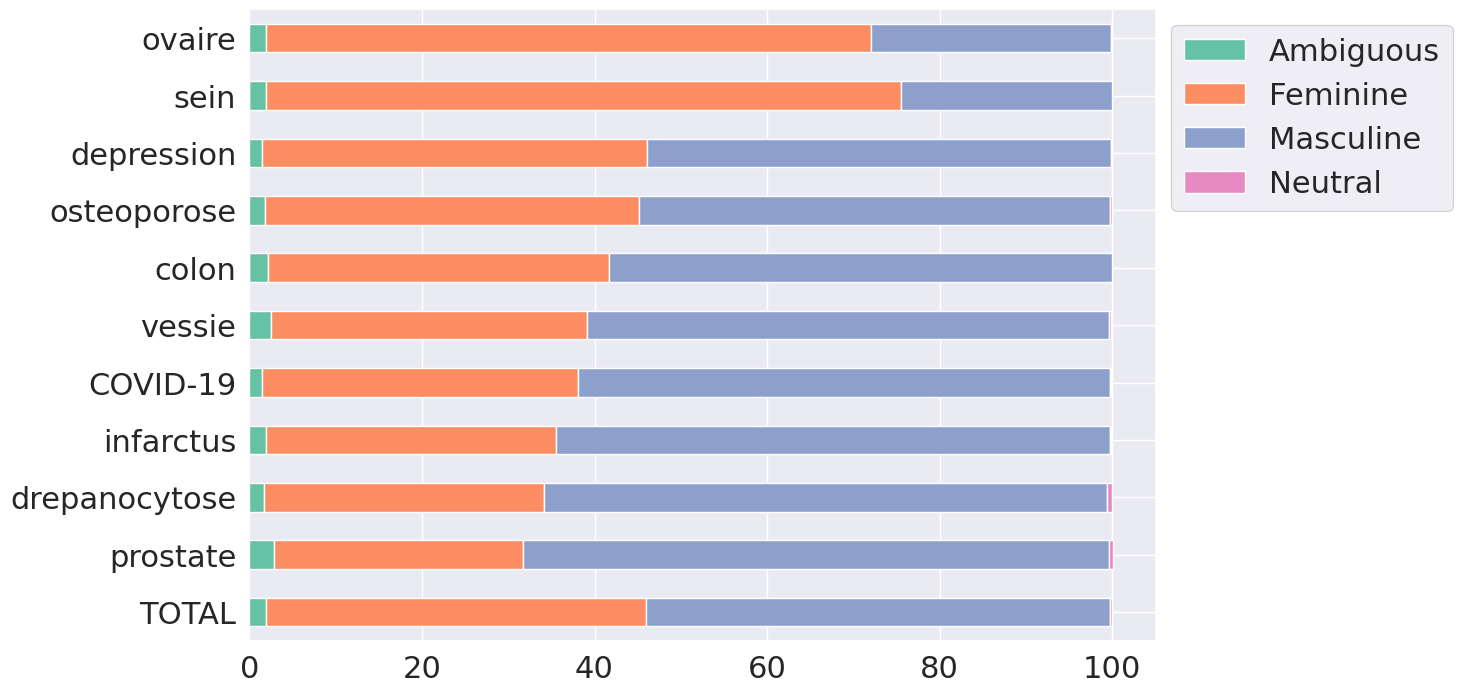

In [56]:
masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

In [57]:
#means = {"total":mean_gap_total}
means = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=round(mean_gap,3)
    
means

{'Llama-3-1-8B-Instruct': 6.71,
 'bloom-7b1': 13.1,
 'Llama-3-1-8B': 5.8,
 'vigogne-2-13b': 15.36,
 'bloom-1b1': 8.51,
 'vigogne-2-7b': -1.13,
 'BioMistral-7b-SLERP': 20.97}

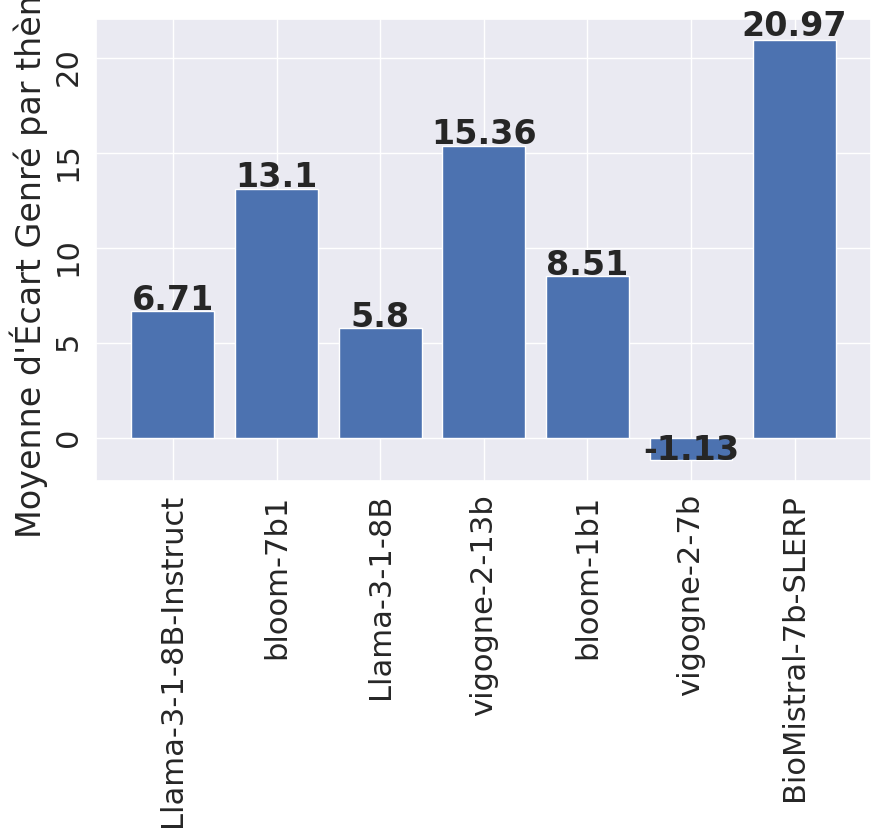

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

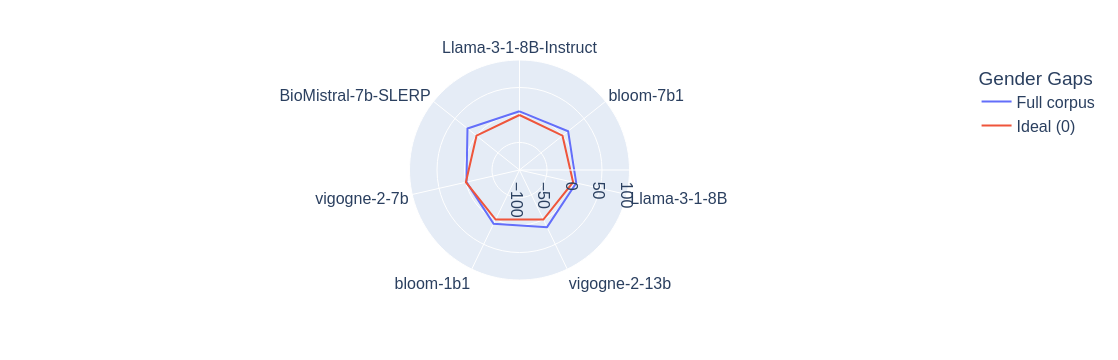

In [59]:
# RADAR PLOT

import plotly.express as px
import pandas as pd

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means.keys())))
#df_avg = pd.DataFrame(dict(r=[mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total], theta=list(means.keys())))
df_full = pd.DataFrame(dict(
    r = list(means.values()),
    theta = list(means.keys())
))
df_full["Gender Gaps"] = "Full corpus"
df_ideal["Gender Gaps"] = "Ideal (0)"
#df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df_full,df_ideal], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model.pdf")

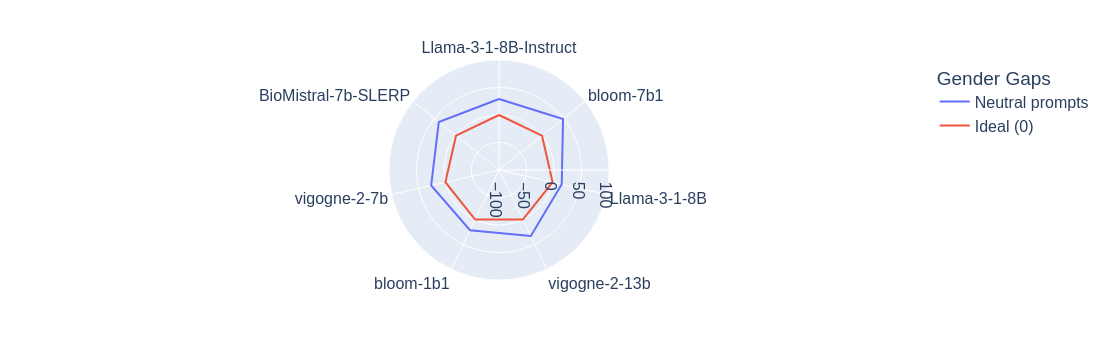

In [60]:
"""ON NEUTRAL PROMPTS ONLY"""
data_neutral = data_genre[data_genre["sex_prompt"] == "neutre"]
means_neutral = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_neutral[data_neutral["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_neutral[model]=round(mean_gap,3)
mean_gap_neutral = sum(means_neutral.values())/len(means_neutral)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_neutral.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_neutral for i in range(len(means_neutral))], theta=list(means_neutral.keys())))
df_neutral = pd.DataFrame(dict(
    r = list(means_neutral.values()),
    theta = list(means_neutral.keys())
))
df_neutral["Gender Gaps"] = "Neutral prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_avg["Gender Gaps"] = "Mean (total)"
df_concat = pd.concat([df_neutral,df_ideal], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

In [49]:
data_genre

Unnamed: 0.1  Unnamed: 0              fichier_ref pathologie  \
0                 0           0  filepdf-56-cas_prostate   prostate   
1                 1           1  filepdf-56-cas_prostate   prostate   
2                 2           2  filepdf-56-cas_prostate   prostate   
3                 3           3  filepdf-56-cas_prostate   prostate   
4                 4           4  filepdf-56-cas_prostate   prostate   
...             ...         ...                      ...        ...   
20895          2895        2895   filepdf-194-cas_ovaire     ovaire   
20896          2896        2896   filepdf-194-cas_ovaire     ovaire   
20897          2897        2897   filepdf-194-cas_ovaire     ovaire   
20898          2898        2898   filepdf-194-cas_ovaire     ovaire   
20899          2899        2899   filepdf-194-cas_ovaire     ovaire   

                                              generation  \
0      Mme D.A âgée de 49 ans, sans antécédents patho...   
1      Nous rapportons le cas d’une patiente de 49 an...   
2      Nous rapportons le cas d’une patiente âgée de ...   
3      Patiente d’âge de 49 ans a présenté des douleu...   
4      Mme A.F est une patiente de 49 ans qui présent...   
...                                                  ...   
20895  Monsieur M, âgé de 55 ans, 2ème pare, 3ème ges...   
20896  Monsieur R.C âgé de 55 ans, 2ème pare, 3ème ge...   
20897  Il s’agit d’un patient âgé de 55 ans, sans ant...   
20898  Nous rapportons le cas d’un patient âgé de 55 ...   
20899  Il s’agissait d’un patient âgé de 55 ans, 2ème...   

                                                   input sex_prompt  \
0      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
1      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
2      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
3      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
4      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
...                                                  ...        ...   
20895  Sexe : masculin ;\nAge : 55 ;\nIl doit conteni...   masculin   
20896  Sexe : masculin ;\nAge : 55 ;\nIl doit conteni...   masculin   
20897  Sexe : masculin ;\nAge : 55 ;\nIl doit conteni...   masculin   
20898  Sexe : masculin ;\nAge : 55 ;\nIl doit conteni...   masculin   
20899  Sexe : masculin ;\nAge : 55 ;\nIl doit conteni...   masculin   

       age_prompt  nb_contraintes  respect_contraintes  scores_reps  \
0              49              17                 0.65         0.04   
1              49              17                 0.82         0.03   
2              49              17                 0.82         0.04   
3              49              17                 0.59         0.08   
4              49              17                 0.82         0.04   
...           ...             ...                  ...          ...   
20895          55              20                 0.50         0.01   
20896          55              20                 0.35         0.03   
20897          55              20                 0.45         0.01   
20898          55              20                 0.35         0.05   
20899          55              20                 0.20         0.17   

       delimitations_cas  cas_multiples  new_gen Identified_gender  \
0                      1              0    False          Feminine   
1                      1              0    False          Feminine   
2                      1              0    False          Feminine   
3                      1              0    False          Feminine   
4                      1              0    False          Feminine   
...                  ...            ...      ...               ...   
20895                  1              0     True          Feminine   
20896                  1              0     True         Masculine   
20897                  1              0     True         Masculine   
20898                  1   

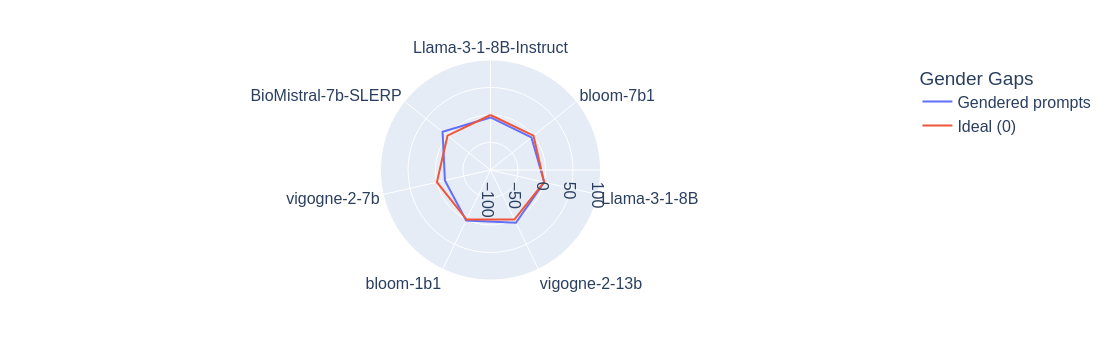

In [61]:
"""ON GENDERED PROMPTS ONLY"""
data_neutral = data_genre[data_genre["sex_prompt"] != "neutre"]
means_neutral = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_neutral[data_neutral["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_neutral[model]=round(mean_gap,3)
mean_gap_neutral = sum(means_neutral.values())/len(means_neutral)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_neutral.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_neutral for i in range(len(means_neutral))], theta=list(means_neutral.keys())))
df_gendered = pd.DataFrame(dict(
    r = list(means_neutral.values()),
    theta = list(means_neutral.keys())
))
df_gendered["Gender Gaps"] = "Gendered prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_avg["Gender Gaps"] = "Mean (total)"
df_concat = pd.concat([df_gendered,df_ideal], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

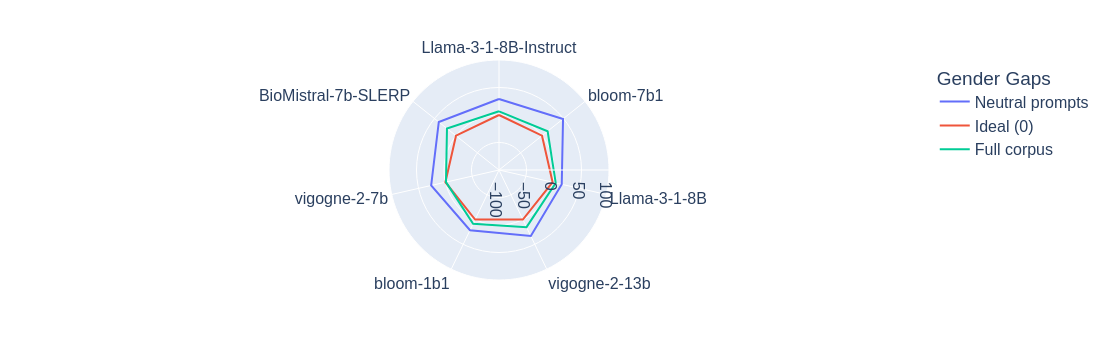

In [62]:
df_concat = pd.concat([df_neutral,df_ideal, df_full], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model_full+neutral.pdf")

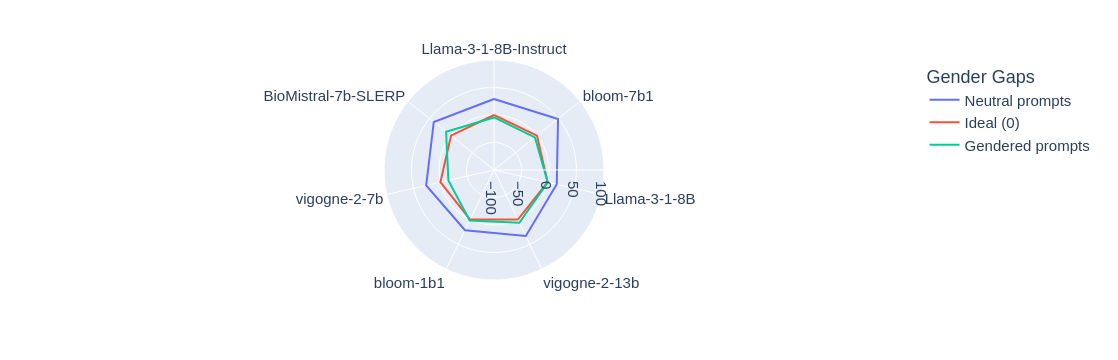

In [63]:
df_concat = pd.concat([df_neutral,df_ideal, df_gendered], axis=0)
fig_model = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig_model.update_layout(
    font_size=15
)
fig_model.show()
#fig.write_image("../../bias_results/fig/radar_gg_model_gendered+neutral_nomulti.pdf")

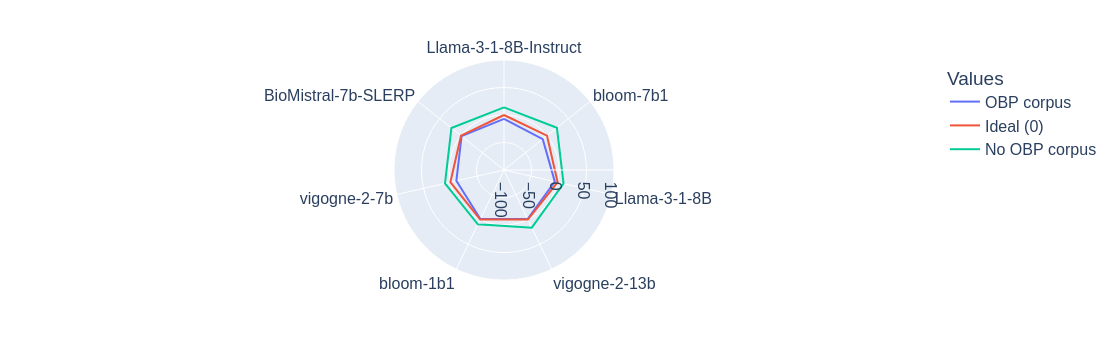

In [64]:
"""ON OVARIAN, BREAST AND PROSTATE CANCER ONLY + ALL BUT THOSE"""
data_obp = data_genre[data_genre["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_obp[data_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_obp[model]=round(mean_gap,3)
mean_gap_obp = sum(means_obp.values())/len(means_obp)

data_no_obp = data_genre[~data_genre["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_no_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_no_obp[data_no_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_no_obp[model]=round(mean_gap,3)
mean_gap_no_obp = sum(means_no_obp.values())/len(means_no_obp)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_obp.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_obp for i in range(len(means_obp))], theta=list(means_obp.keys())))
df_obp = pd.DataFrame(dict(
    r = list(means_obp.values()),
    theta = list(means_obp.keys())
))
df_no_obp = pd.DataFrame(dict(
    r = list(means_no_obp.values()),
    theta = list(means_no_obp.keys())
))
df_obp["Values"] = "OBP corpus"
df_no_obp["Values"] = "No OBP corpus"
df_ideal["Values"] = "Ideal (0)"
df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df_obp,df_ideal, df_no_obp], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Values', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

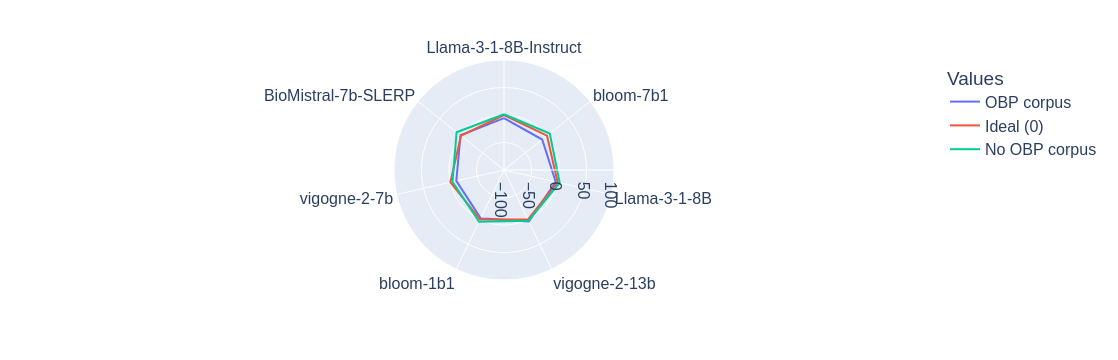

In [65]:
"""ON OVARIAN, BREAST AND PROSTATE CANCER ONLY + ALL BUT THOSE
+ ONLY ON GENDERED PROMPTS"""
data_gendered = data_genre[data_genre["sex_prompt"] != "neutre"]
data_obp = data_gendered[data_gendered["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_obp[data_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_obp[model]=round(mean_gap,3)
mean_gap_obp = sum(means_obp.values())/len(means_obp)

data_no_obp = data_gendered[~data_gendered["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_no_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_no_obp[data_no_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_no_obp[model]=round(mean_gap,3)
mean_gap_no_obp = sum(means_no_obp.values())/len(means_no_obp)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_obp.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_obp for i in range(len(means_obp))], theta=list(means_obp.keys())))
df_obp = pd.DataFrame(dict(
    r = list(means_obp.values()),
    theta = list(means_obp.keys())
))
df_no_obp = pd.DataFrame(dict(
    r = list(means_no_obp.values()),
    theta = list(means_no_obp.keys())
))
df_obp["Values"] = "OBP corpus"
df_no_obp["Values"] = "No OBP corpus"
df_ideal["Values"] = "Ideal (0)"
df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df_obp,df_ideal, df_no_obp], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Values', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

In [66]:
df_neutral.drop("Values",axis=1)#.to_latex()

KeyError: "['Values'] not found in axis"

In [ ]:
df_gendered

In [67]:
def gap(topics,data_genre):
    gap = {}  # seulement topic et gap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre, label,topic)
        # gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0

        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        sorted_gap = trier_dic(gap)

    return sorted_gap

#print(mean_gap)
#sorted_gap["total"]=mean_gap


[['prostate', 39.00000000000001], ['drepanocytose', 32.7], ['infarctus', 30.699999999999996], ['COVID-19', 25.0], ['vessie', 23.9], ['colon', 18.699999999999996], ['osteoporose', 11.300000000000004], ['depression', 9.099999999999994], ['ovaire', -42.400000000000006], ['sein', -49.099999999999994]]
[['COVID-19', 25.0], ['colon', 18.699999999999996], ['depression', 9.099999999999994], ['drepanocytose', 32.7], ['infarctus', 30.699999999999996], ['osteoporose', 11.300000000000004], ['ovaire', -42.400000000000006], ['prostate', 39.00000000000001], ['sein', -49.099999999999994], ['vessie', 23.9]]


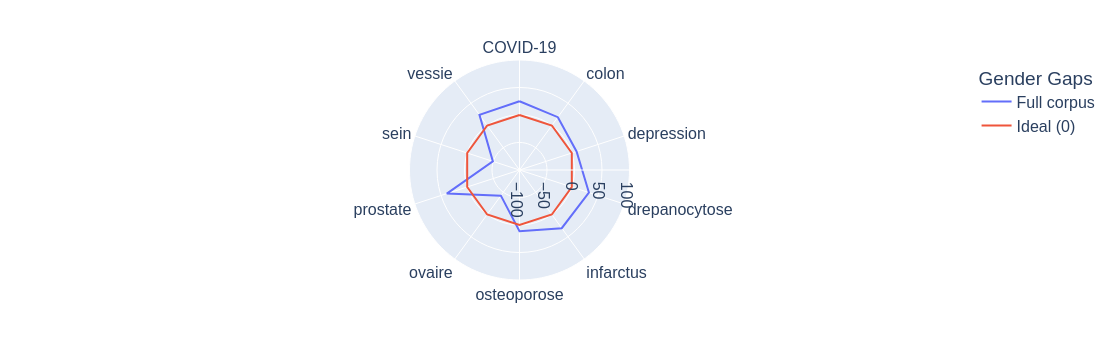

In [68]:
sorted_gap = gap(topics,data_genre)
print(sorted_gap)
sorted_gap.sort(key=lambda tup: tup[0])
print(sorted_gap)
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap for i in range(len(sorted_gap))], theta=[el[0] for el in sorted_gap]))

df_real = pd.DataFrame(dict(r=[100,0,20,24,62,4,-40,-33,-100,-98], theta=[el[0] for el in sorted_gap]))

df_full = pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df_full["Gender Gaps"] = "Full corpus"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_real["Gender Gaps"] = "Real-world data"
#df_avg["Values"] = "Mean (total)"

df_concat = pd.concat([df_full,df_ideal], axis=0)


fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template="plotly")
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology.pdf")

[['infarctus', 76.6], ['prostate', 76.3], ['drepanocytose', 71.8], ['vessie', 64.9], ['COVID-19', 57.3], ['colon', 51.300000000000004], ['osteoporose', 33.199999999999996], ['depression', 28.699999999999996], ['ovaire', -72.5], ['sein', -78.60000000000001]]
[['COVID-19', 57.3], ['colon', 51.300000000000004], ['depression', 28.699999999999996], ['drepanocytose', 71.8], ['infarctus', 76.6], ['osteoporose', 33.199999999999996], ['ovaire', -72.5], ['prostate', 76.3], ['sein', -78.60000000000001], ['vessie', 64.9]]


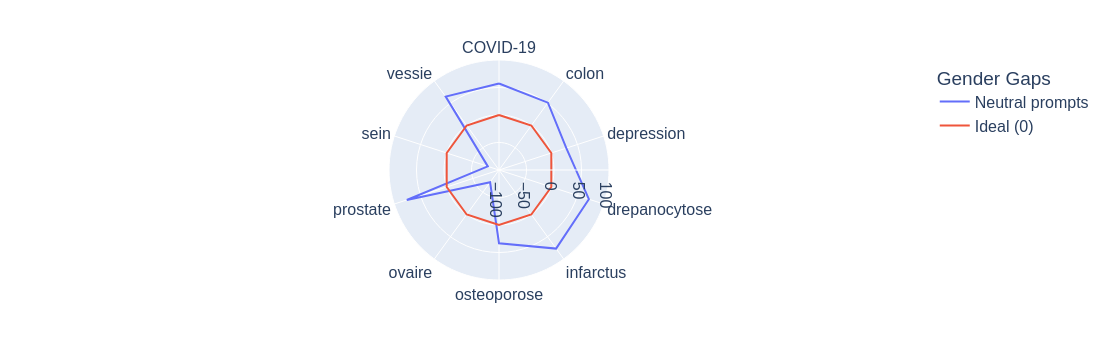

In [69]:
"""ONLY ON NEUTRAL PROMPTS"""
sorted_gap = gap(topics,data_genre[data_genre["sex_prompt"] == "neutre"])
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
print(sorted_gap)
sorted_gap.sort(key=lambda tup: tup[0])
print(sorted_gap)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap for i in range(len(sorted_gap))], theta=[el[0] for el in sorted_gap]))

df_real = pd.DataFrame(dict(r=[100,20,0,62,24,4,-40,-33,-100,-98], theta=[el[0] for el in sorted_gap]))

df_neutral = pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df_neutral["Gender Gaps"] = "Neutral prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_real["Gender Gaps"] = "Real-world data"
#df_avg["Values"] = "Mean (total)"

df_concat = pd.concat([df_neutral,df_ideal], axis=0)

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology+neutral.pdf")

[['prostate', 20.5], ['drepanocytose', 13.200000000000003], ['COVID-19', 8.899999999999999], ['infarctus', 7.799999999999997], ['vessie', 3.5], ['colon', 2.5], ['osteoporose', 0.30000000000000426], ['depression', -0.8000000000000043], ['ovaire', -27.300000000000004], ['sein', -34.300000000000004]]
[['COVID-19', 8.899999999999999], ['colon', 2.5], ['depression', -0.8000000000000043], ['drepanocytose', 13.200000000000003], ['infarctus', 7.799999999999997], ['osteoporose', 0.30000000000000426], ['ovaire', -27.300000000000004], ['prostate', 20.5], ['sein', -34.300000000000004], ['vessie', 3.5]]


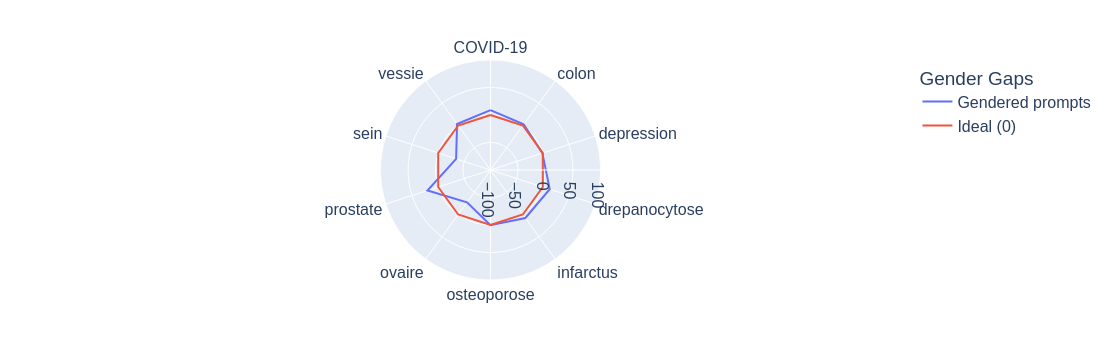

In [70]:
"""ONLY ON GENDERED PROMPTS"""
sorted_gap = gap(topics,data_genre[data_genre["sex_prompt"] != "neutre"])
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
print(sorted_gap)
sorted_gap.sort(key=lambda tup: tup[0])
print(sorted_gap)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap for i in range(len(sorted_gap))], theta=[el[0] for el in sorted_gap]))
)
df_real = pd.DataFrame(dict(r=[100,20,0,62,24,4,-40,-33,-100,-98], theta=[el[0] for el in sorted_gap]))

df_gendered= pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df_gendered["Gender Gaps"] = "Gendered prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_real["Gender Gaps"] = "Real-world data"
#df_avg["Values"] = "Mean (total)"

df_concat = pd.concat([df_gendered,df_ideal], axis=0)

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology+gendered.pdf")

In [60]:
a = [['prostate', 22.799999999999997], ['drepanocytose', 16.5], ['infarctus', 9.400000000000006], ['COVID-19', 9.300000000000004], ['vessie', 4.299999999999997], ['colon', 1.8999999999999986], ['osteoporose', 0.20000000000000284], ['depression', -0.29999999999999716], ['ovaire', -27.200000000000003], ['sein', -36.10000000000001]]
val = [el[1] for el in a]
print(sum(val)/len(val))

0.07999999999999971


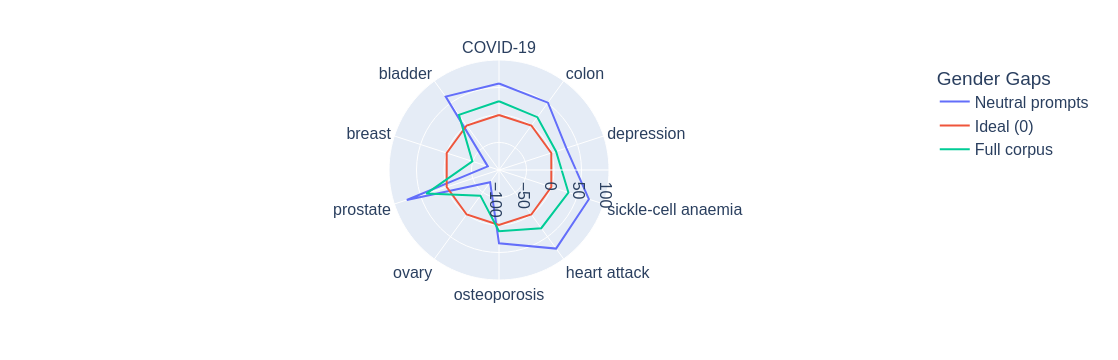

In [71]:
plt.style.use('tableau-colorblind10')
df_concat = pd.concat([df_neutral,df_ideal, df_full], axis=0)
#bladder148cancer, breast cancer, colon cancer, COVID-19, de-149pression, heart attack, osteoporosis, ovarian cancer,150prostate cancer,  and sickle-cell anaemia.
df_concat["theta"] = df_concat["theta"].replace({"vessie":"bladder", "drepanocytose":"sickle-cell anaemia", "infarctus":"heart attack", "osteoporose":"osteoporosis", "ovaire":"ovary", "sein":"breast"})

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template="plotly")
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology_full+neutral_nomulti.pdf")

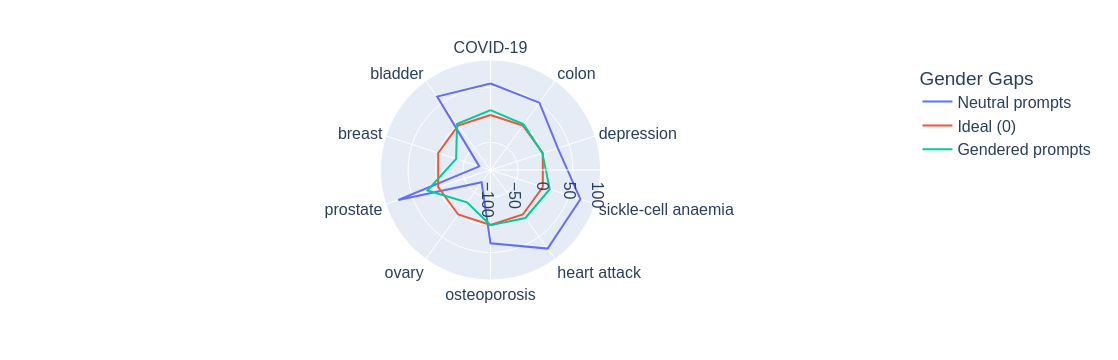

In [81]:
plt.style.use('tableau-colorblind10')
df_concat = pd.concat([df_neutral,df_ideal, df_gendered], axis=0)
#bladder148cancer, breast cancer, colon cancer, COVID-19, de-149pression, heart attack, osteoporosis, ovarian cancer,150prostate cancer,  and sickle-cell anaemia.
df_concat["theta"] = df_concat["theta"].replace({"vessie":"bladder", "drepanocytose":"sickle-cell anaemia", "infarctus":"heart attack", "osteoporose":"osteoporosis", "ovaire":"ovary", "sein":"breast"})

fig_patho = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template="plotly", color_discrete_map={"Neutral prompts": "pink"})
fig_patho.update_layout(
    font_size=16
)
#fig.update_traces(color='pink', line_width=5)
fig_patho.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology_gendered+neutral_nomulti.pdf")

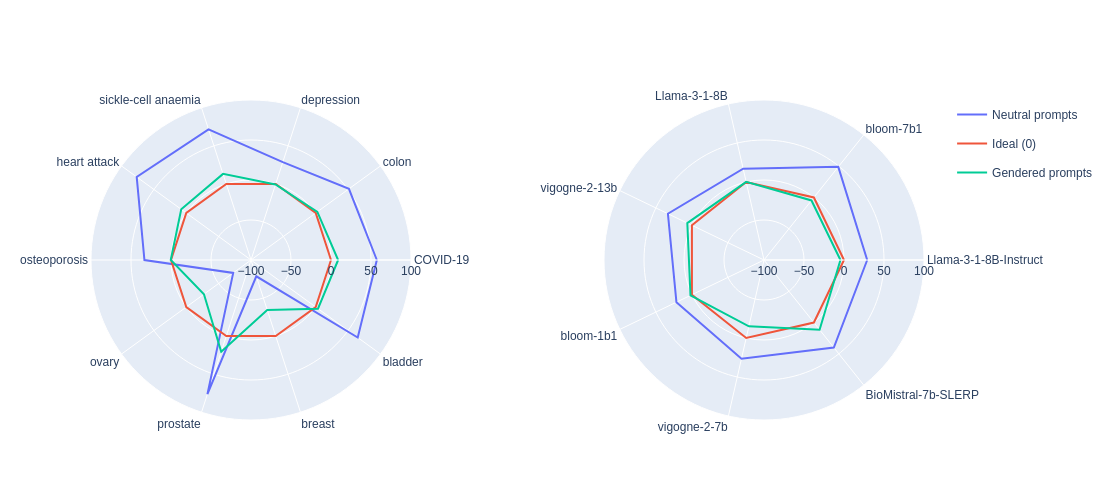

In [73]:
"""Subfigures for radar plots fig_model and fig_patho in one figure"""
, color_discrete_map={"Neutral prompts": "pink"}
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,    horizontal_spacing=0.2, specs=[[{'type': 'polar'}, {'type': 'polar'}]])

# Add the traces from fig_patho to the first subplot
for trace in fig_patho.data:
    fig.add_trace(trace, row=1, col=1)

# Add the traces from fig_model to the second subplot
for trace in fig_model.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    width=1000,  
    height=500, 
    polar=dict(
        radialaxis=dict(range=[-100, 100])
    ),
    showlegend=True)

# Remove the legend for the second plot (fig_model)
fig.update_traces(showlegend=False, row=1, col=2)

# Update each polar plot separately to ensure the range is set correctly
fig.update_polars(radialaxis=dict(range=[-100, 100]), row=1, col=1)  # First plot
fig.update_polars(radialaxis=dict(range=[-100, 100]), row=1, col=2)  # Second plot

fig.show()
#fig.write_image("../../bias_results/fig/radar_patho_model_subplots.pdf")

In [49]:
fig_patho.data

(Scatterpolar({
     'hovertemplate': 'Gender Gaps=Neutral prompts<br>r=%{r}<br>theta=%{theta}<extra></extra>',
     'legendgroup': 'Neutral prompts',
     'line': {'color': '#636efa', 'dash': 'solid'},
     'marker': {'symbol': 'circle'},
     'mode': 'lines',
     'name': 'Neutral prompts',
     'r': array([ 57.3,  51.3,  28.7,  71.8,  76.6,  33.2, -72.5,  76.3, -78.6,  64.9,
                  57.3]),
     'showlegend': True,
     'subplot': 'polar',
     'theta': array(['COVID-19', 'colon', 'depression', 'sickle-cell anaemia',
                     'heart attack', 'osteoporosis', 'ovary', 'prostate', 'breast',
                     'bladder', 'COVID-19'], dtype=object)
 }),
 Scatterpolar({
     'hovertemplate': 'Gender Gaps=Ideal (0)<br>r=%{r}<br>theta=%{theta}<extra></extra>',
     'legendgroup': 'Ideal (0)',
     'line': {'color': '#EF553B', 'dash': 'solid'},
     'marker': {'symbol': 'circle'},
     'mode': 'lines',
     'name': 'Ideal (0)',
     'r': array([0., 0., 0., 0., 0., 0.,

In [59]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["pathologie"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    #table_new = dic_list_noempty(table)
    table_new = table

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n1 = [dic[genre] for dic in table_new]
        n2 = [float(el[:-1]) for el in n1]
        n = sum(n2)
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    print("**************")
    print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
61.6%        36.6%       1.6%         0.2%       COVID-19
27.8%        70.2%       2.0%         0.1%       ovaire
66.0%        31.7%       1.8%         0.5%       drepanocytose
57.9%        40.0%       2.1%         0.0%       colon
54.1%        43.6%       2.0%         0.3%       osteoporose
24.0%        74.2%       1.8%         0.0%       sein
60.7%        36.5%       2.3%         0.5%       vessie
68.6%        28.3%       2.7%         0.5%       prostate
64.4%        33.4%       2.0%         0.2%       infarctus
53.9%        44.6%       1.3%         0.1%       depression
[{'Masculine': '61.6%', 'Feminine': '36.6%', 'Ambiguous': '1.6%', 'Neutral': '0.2%', 'topic': 'COVID-19'}, {'Feminine': '70.2%', 'Masculine': '27.8%', 'Ambiguous': '2.0%', 'Neutral': '0.1%', 'topic': 'ovaire'}, {'Masculine': '66.0%', 'Feminine': '31.7%', 'Ambiguous': '1.8%', 'Neutral': '0.5%', 'topic'

ValueError: Length of values (11) does not match length of index (21)

In [ ]:
df = pd.DataFrame(dict(
    r = list(means.values()),
    theta = list(means.keys())
))
fig = px.line_polar(df, r='r', theta='theta', line_close=True, range_r=[-50,50])
fig.show()

## Croisement proportions genre par modèle ET par domaine professionnel

In [38]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["pathologie"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["pathologie"]))
topic_mod = {}

data_neutre = data_genre[data_genre["sex_prompt"]=="neutre"]
"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_neutre[data_neutre["model"] == model])
    #topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_neutre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("colorblind"))
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 Llama-3-1-8B-Instruct


ZeroDivisionError: division by zero

In [44]:
"""Ordre par topic, puis par modèle"""

"""ATTENTION CHANGEMENT DE COULEURS, À CORRIGER #TODO"""

#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_neutre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("colorblind"))
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

In [56]:
topics

['ovaire',
 'osteoporose',
 'colon',
 'depression',
 'sein',
 'COVID-19',
 'vessie',
 'drepanocytose',
 'prostate',
 'infarctus']

In [53]:
data_neutre

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, fichier_ref, pathologie, generation, input, sex_prompt, age_prompt, nb_contraintes, respect_contraintes, scores_reps, delimitations_cas, cas_multiples, new_gen, Identified_gender, Detailed_counter, Detailed_markers, model]
Index: []


 ovaire
Feminine    Masculine    Ambiguous    model                  Neutral
----------  -----------  -----------  ---------------------  ---------
90.0%       9.0%         1.0%         Llama-3-1-8B-Instruct
93.0%       7.0%                      bloom-7b1
84.0%       13.0%        2.0%         Llama-3-1-8B           1.0%
95.0%       2.0%         2.0%         vigogne-2-13b          1.0%
56.0%       40.0%        4.0%         bloom-1b1
94.0%       5.0%         1.0%         vigogne-2-7b
84.0%       12.0%        4.0%         BioMistral-7b-SLERP

 osteoporose
Masculine    Feminine    Ambiguous    model                  Neutral
-----------  ----------  -----------  ---------------------  ---------
59.0%        38.0%       3.0%         Llama-3-1-8B-Instruct
89.0%        8.0%        3.0%         bloom-7b1
51.0%        46.0%       3.0%         Llama-3-1-8B
72.0%        26.0%       2.0%         vigogne-2-13b
51.0%        47.0%       2.0%         bloom-1b1
71.0%        26.0%       2.0%         vig

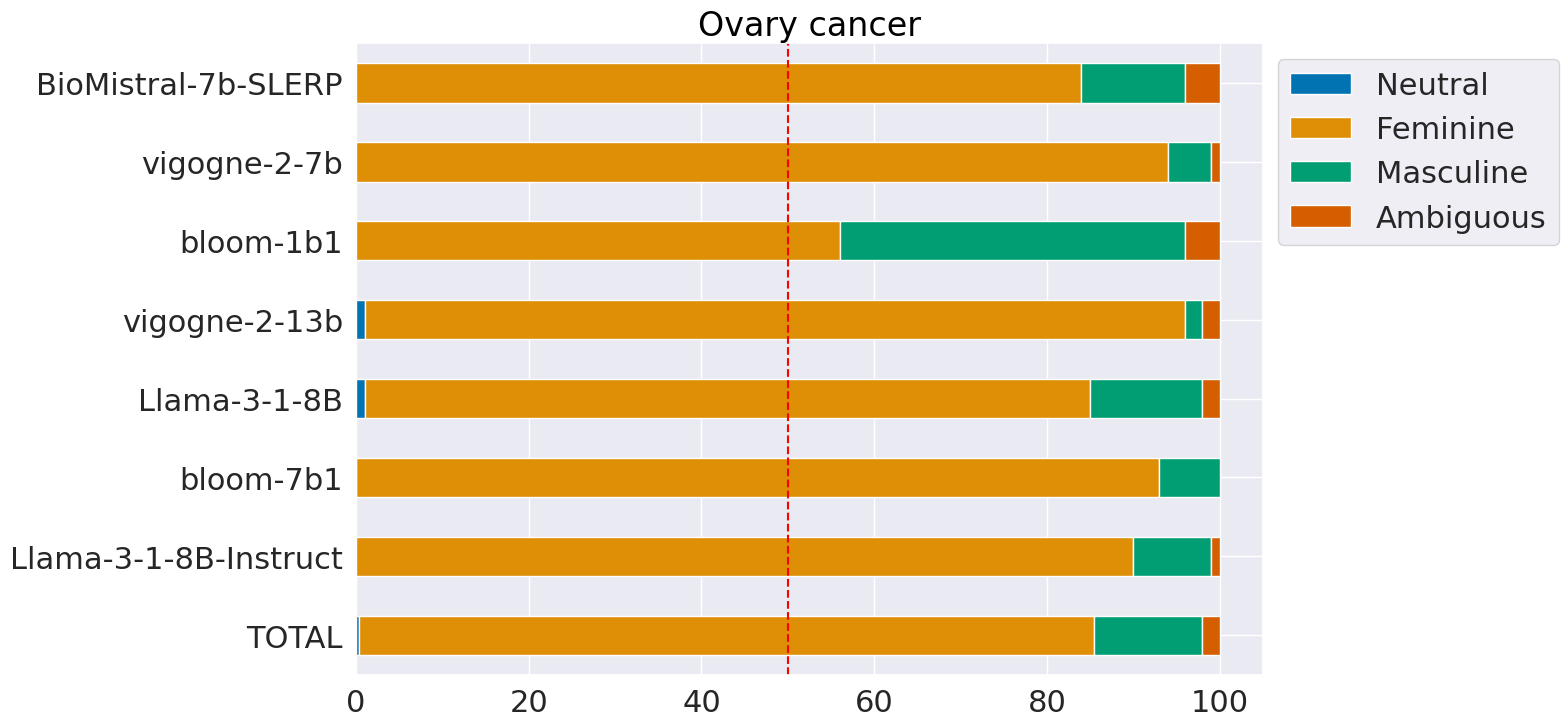

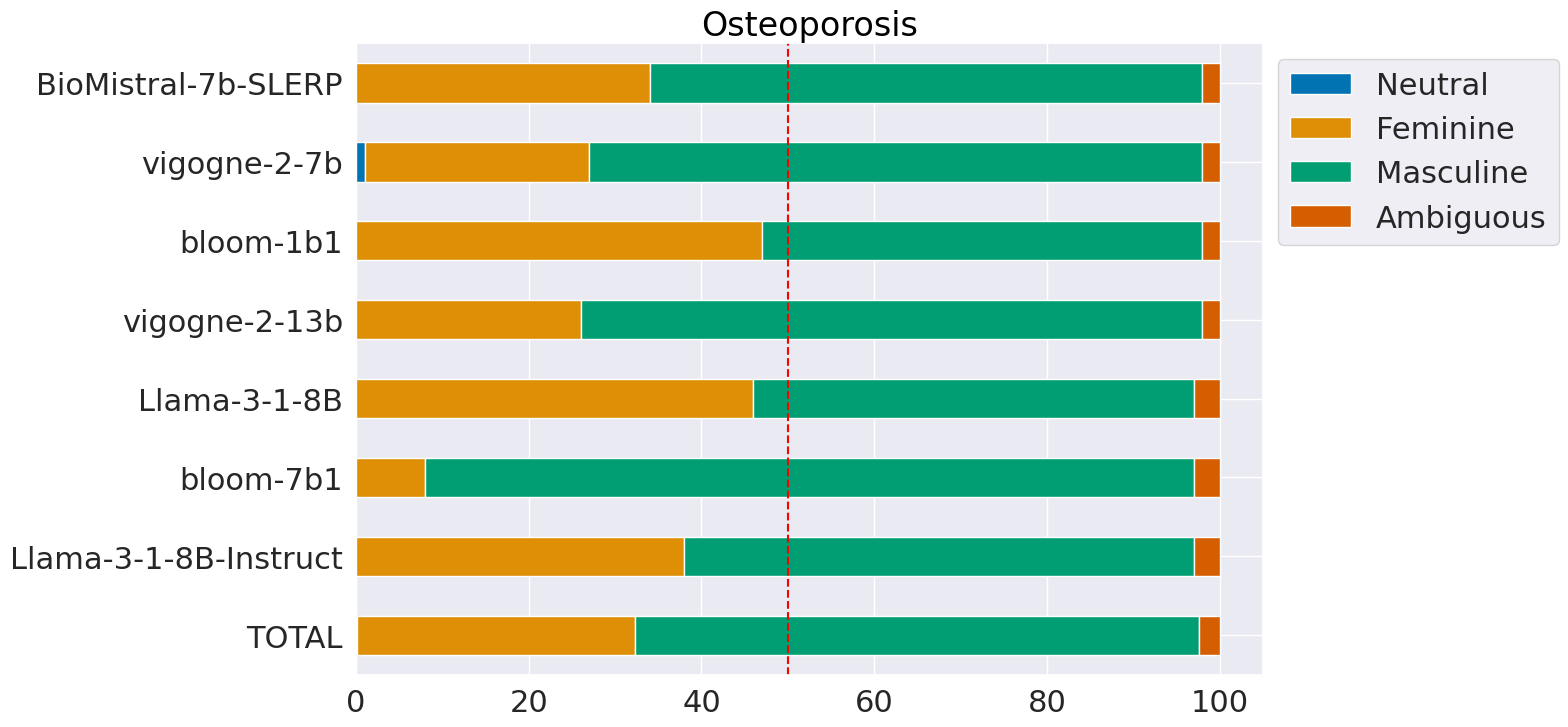

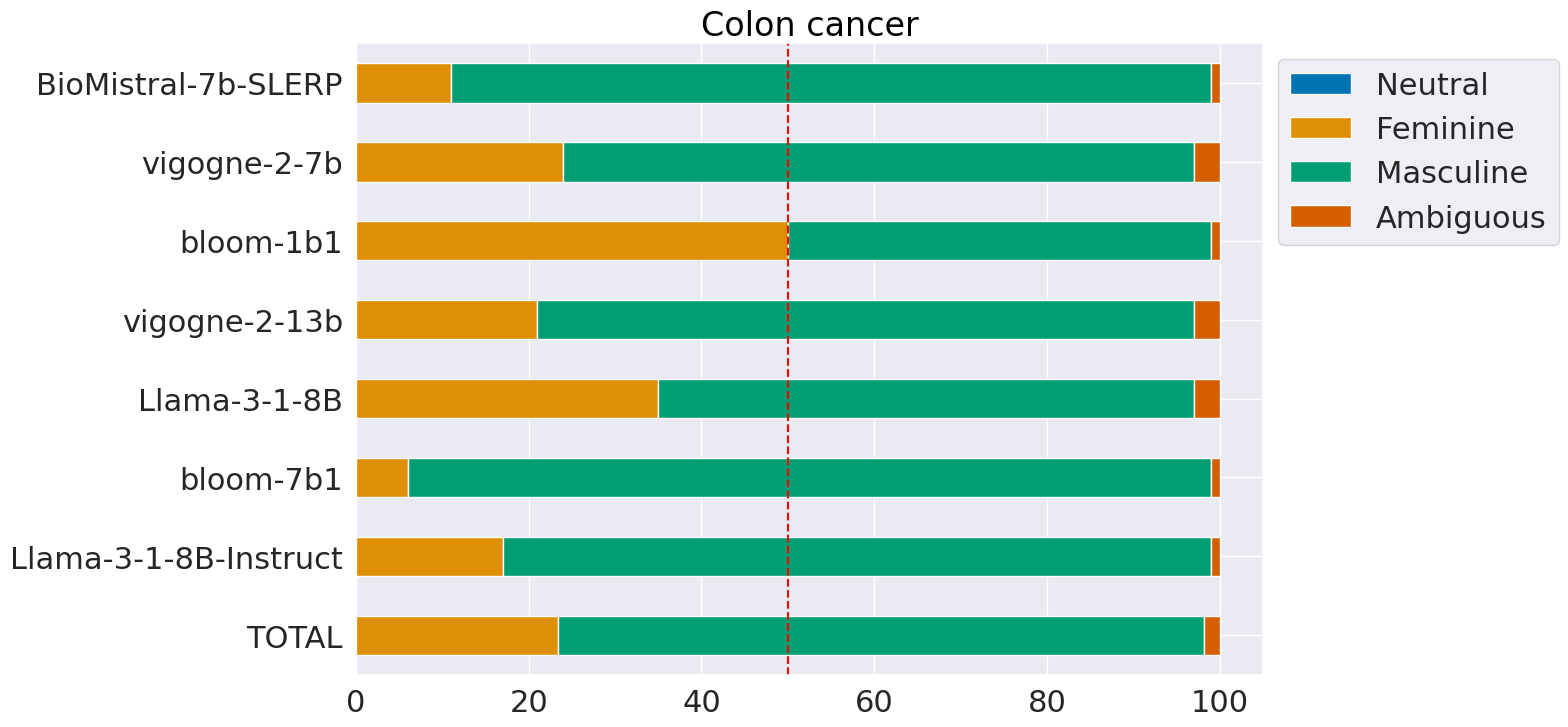

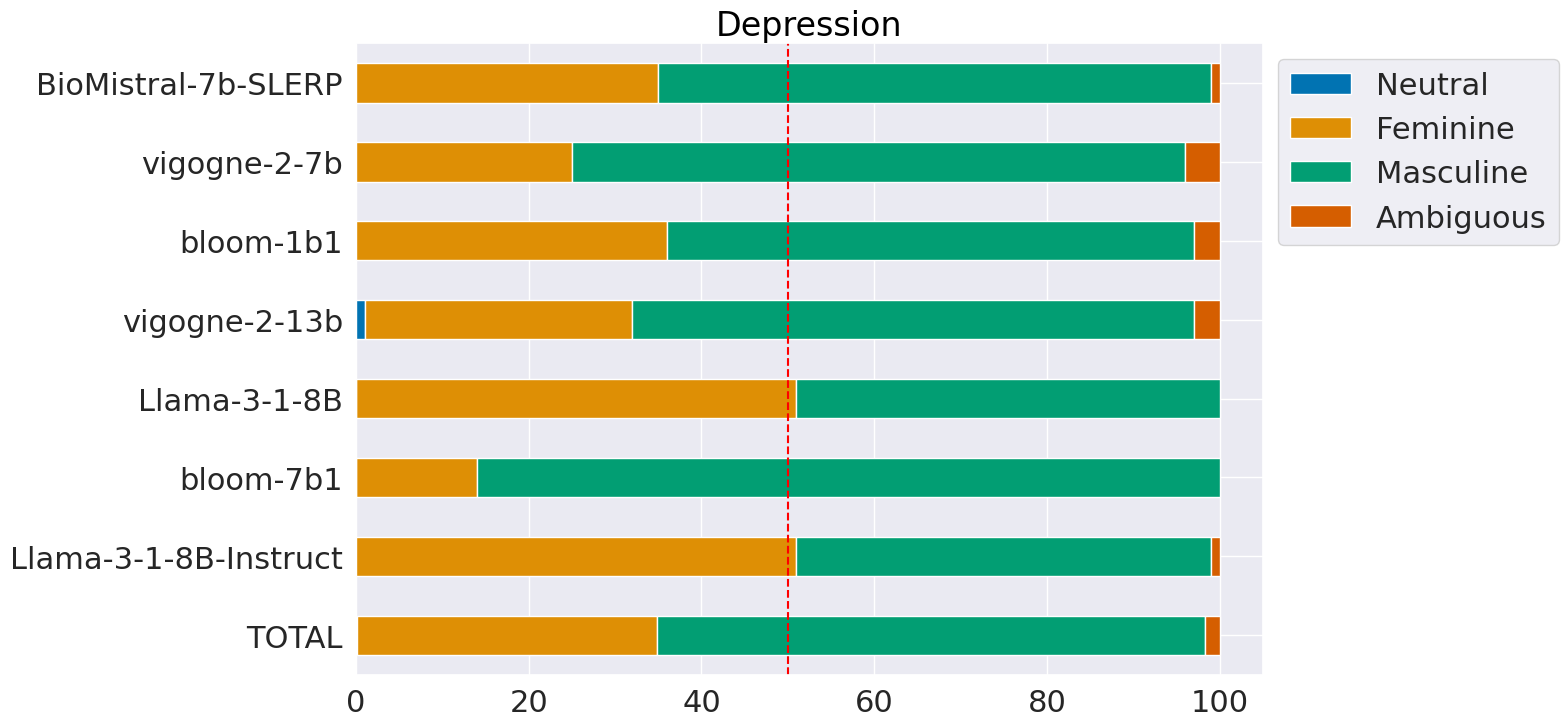

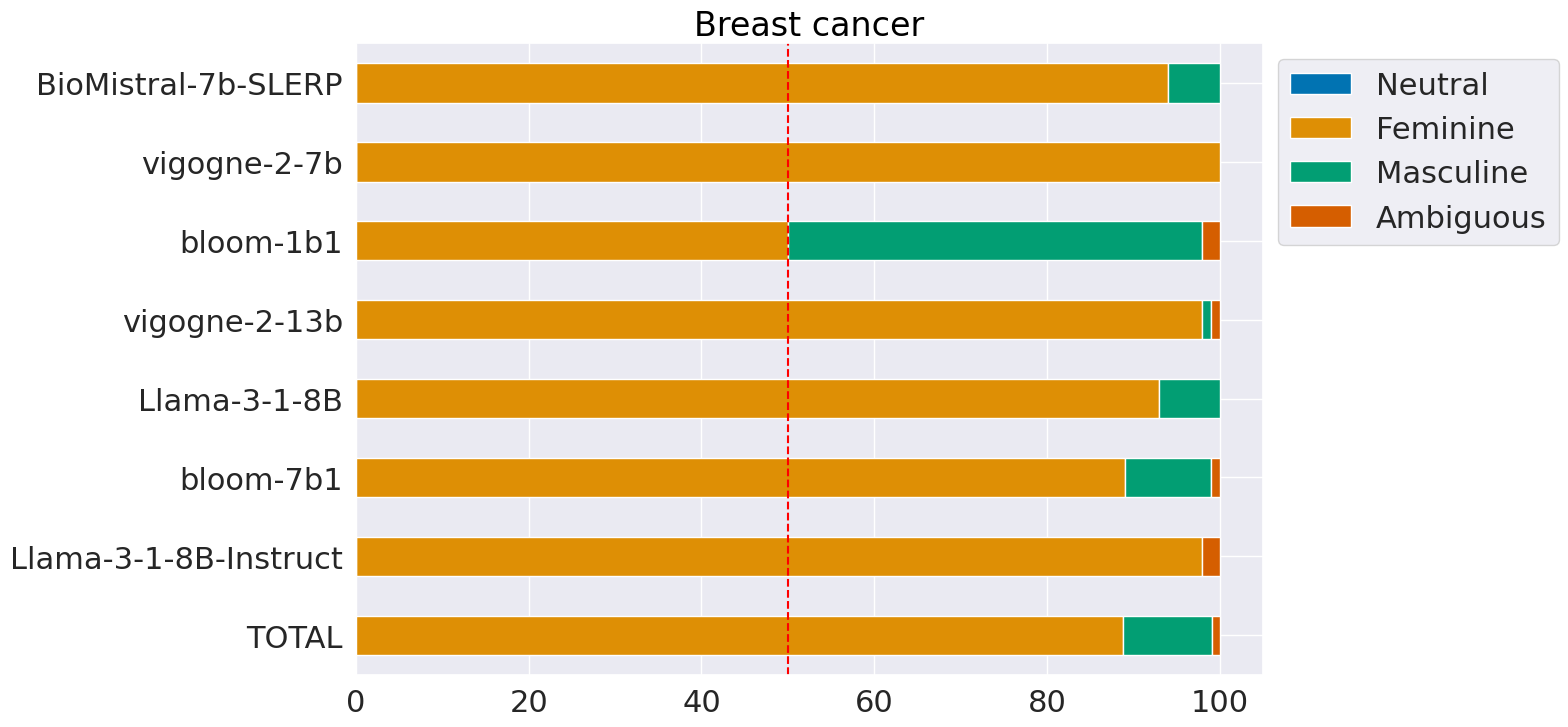

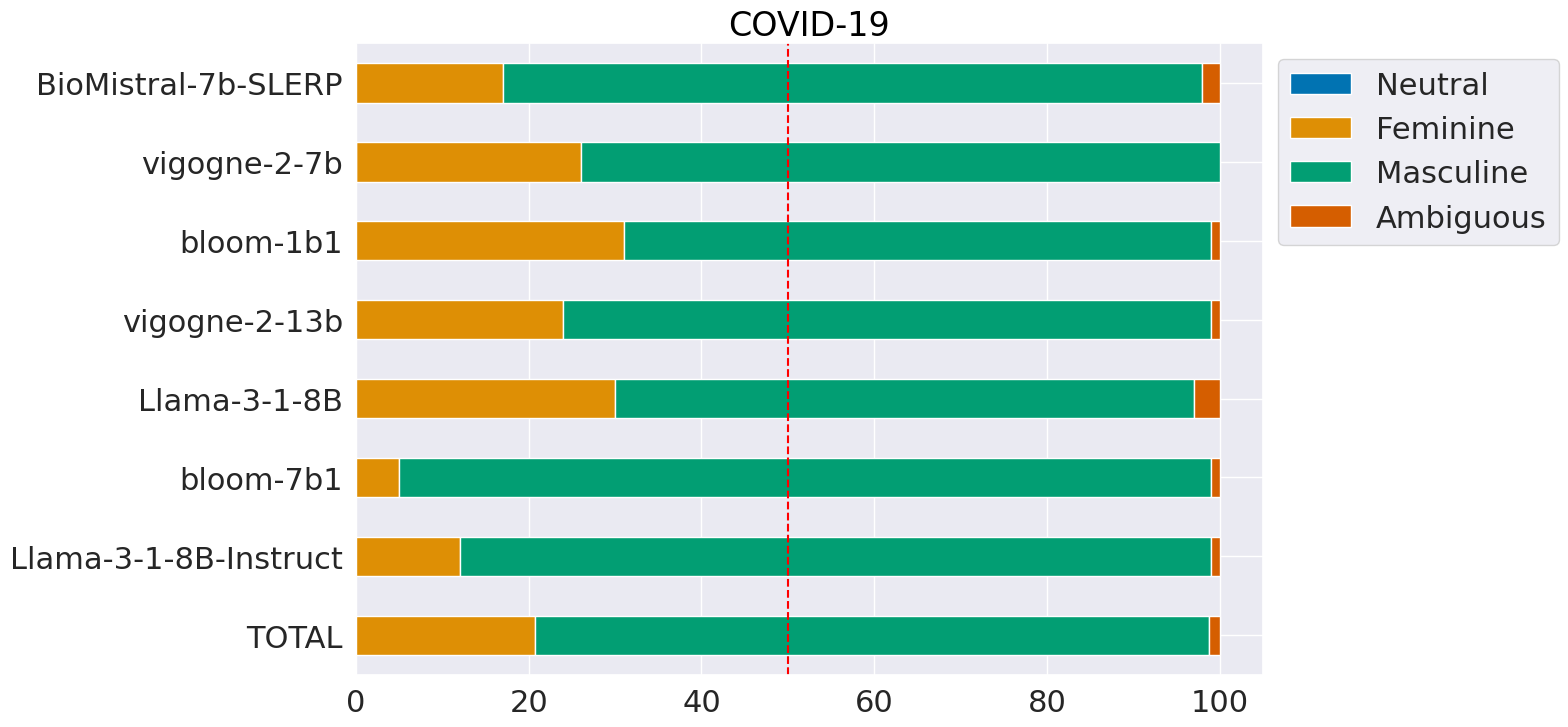

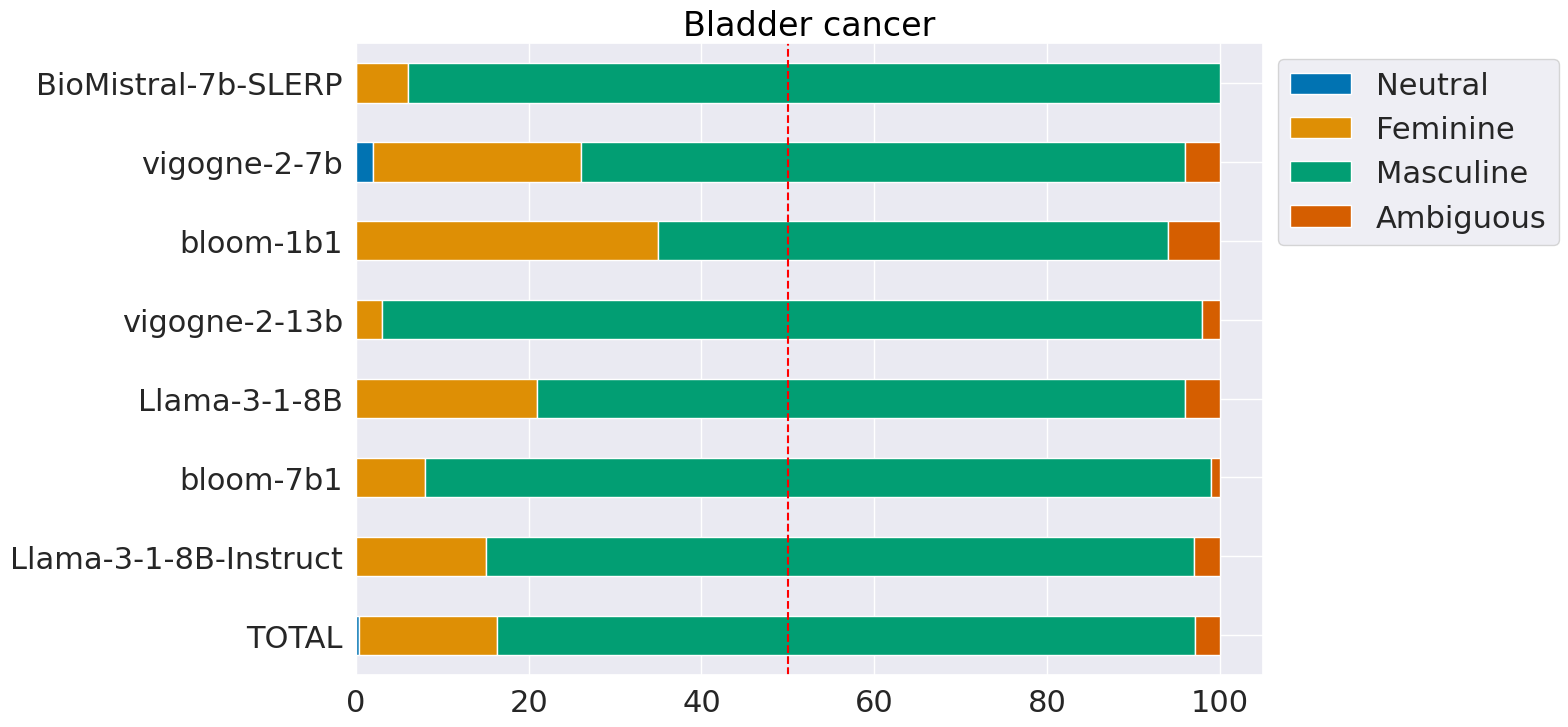

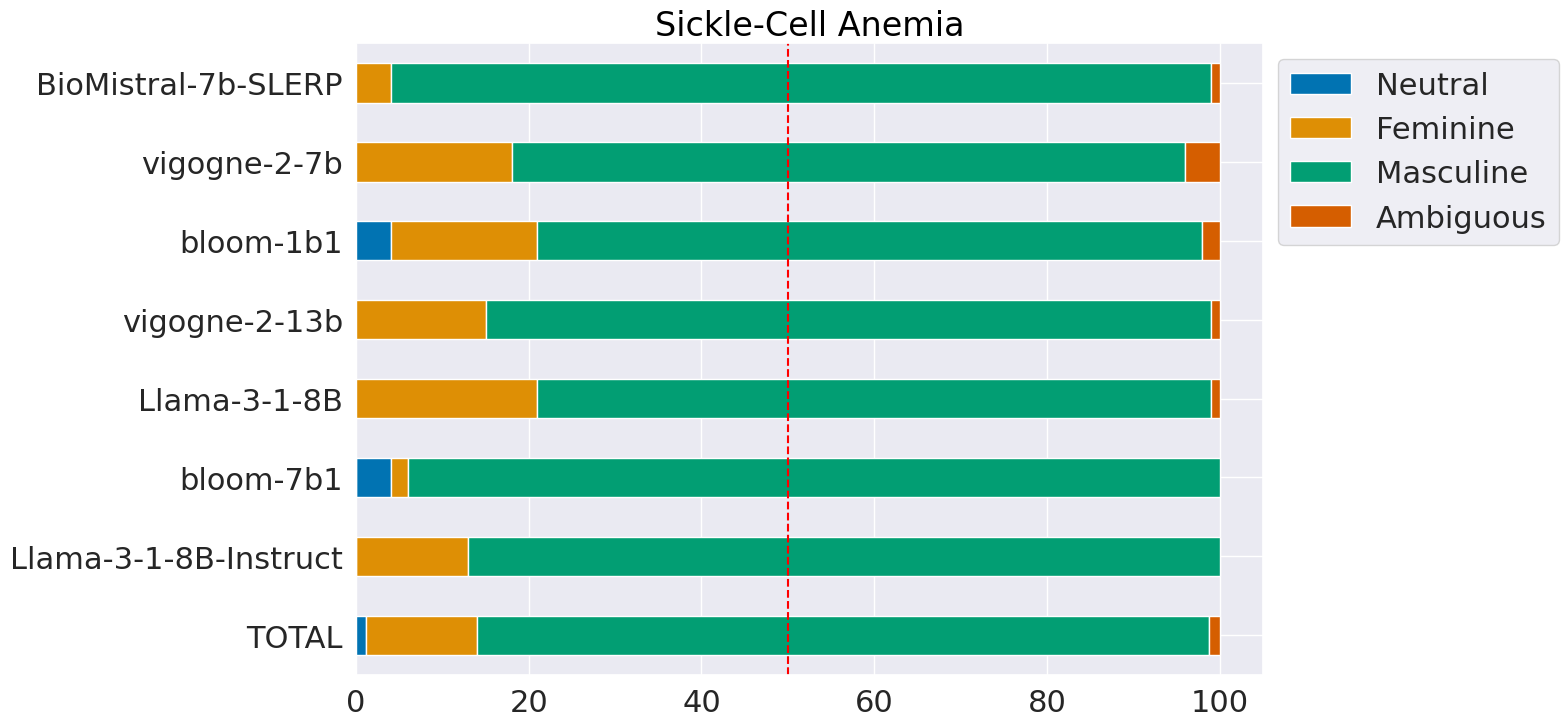

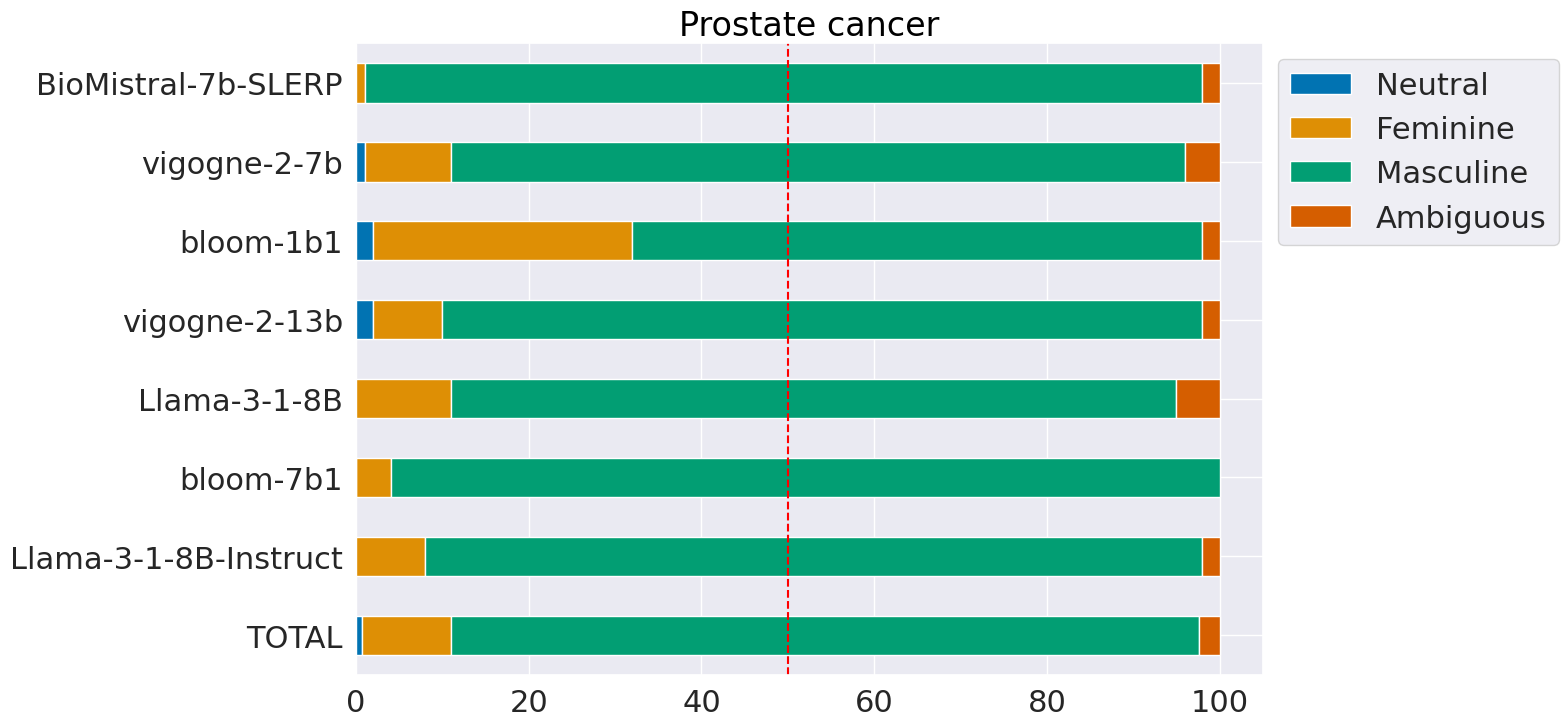

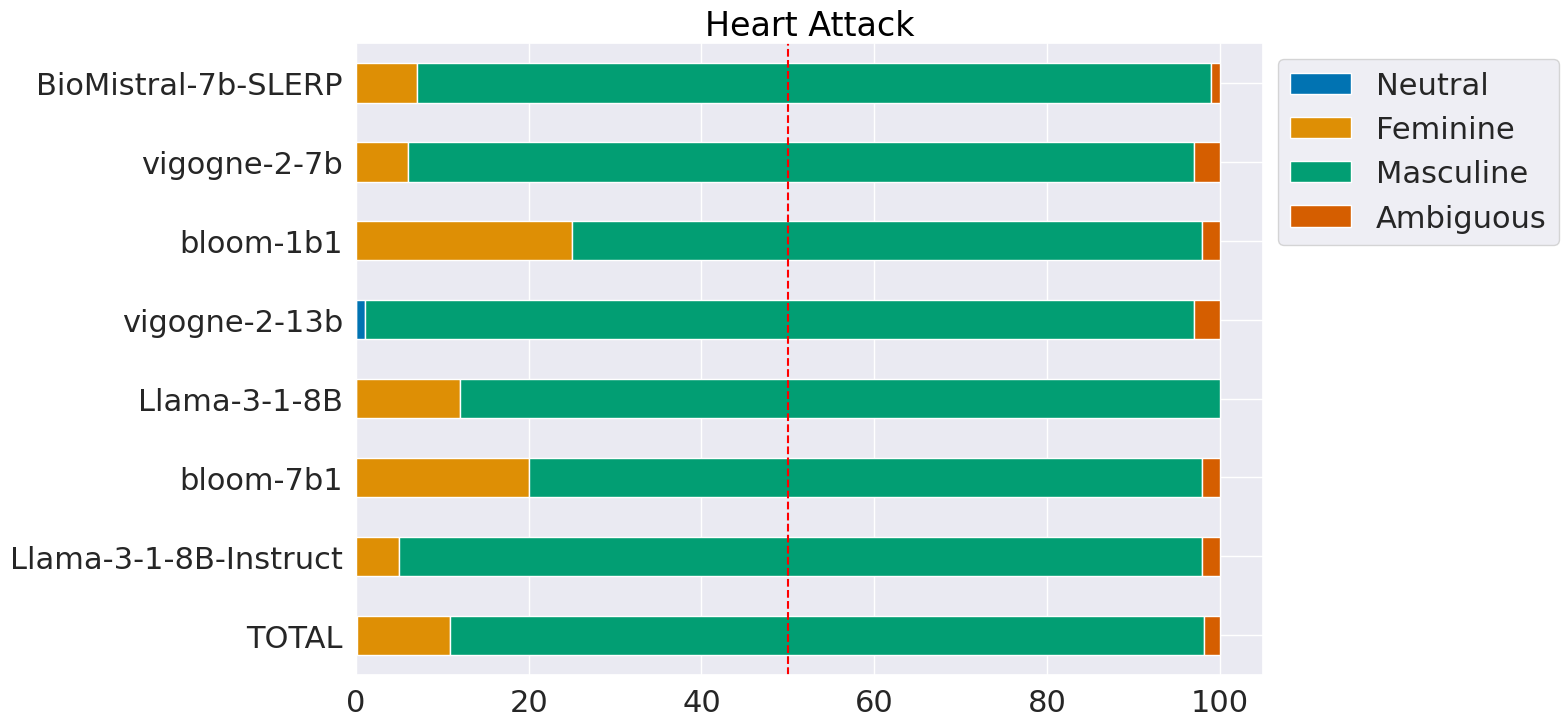

In [55]:
topics_en = {
        'osteoporose': 'Osteoporosis',
        'ovaire': 'Ovary cancer',
        'infarctus': 'Heart Attack',
        'prostate': 'Prostate cancer',
        'depression': 'Depression',
        'sein': 'Breast cancer',
        'COVID-19': 'COVID-19',
        'colon': 'Colon cancer',
        'vessie': 'Bladder cancer',
        'drepanocytose': 'Sickle-Cell Anemia'
    }
topics = list(set(data_genre["pathologie"]))

data_neutre = data_genre[data_genre["sex_prompt"]=="neutre"]

for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_neutre, label, model, topic)
        op['model'] = model
        table.append(op)

    print("\n", topic)
    print(tabulate(table, headers='keys'))
    
    # Ensure each genre is present, if not assign "0%"
    for d in table:
        for genre in ["Neutral", "Feminine", "Masculine", "Ambiguous"]:
            if genre not in d:
                d[genre] = "0%"

    # Convert percentage strings to float values for computation
    table_new = [{"Neutral": float(d["Neutral"][:-1]), 
                  "Feminine": float(d["Feminine"][:-1]),
                  "Masculine": float(d["Masculine"][:-1]),
                  "Ambiguous": float(d["Ambiguous"][:-1])} 
                 for d in table]
    
    # Calculate averages and insert at the start of the table
    new_dic = {}
    for genre in ["Neutral", "Feminine", "Masculine", "Ambiguous"]:
        new_dic[genre] = sum([d[genre] for d in table_new]) / len(table_new)
    
    table_new.insert(0, new_dic)

    # Translate labels to English if needed (assuming no translation required here)
    df = pd.DataFrame(table_new, index=["TOTAL"] + modeles)
    
    # Create the horizontal stacked bar plot
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("colorblind"))
    ax.set_title(topics_en[topic], color='black')

    ax.legend(["Neutral", "Feminine", "Masculine", "Ambiguous"], bbox_to_anchor=(1.0, 1.0))
    
    # Add a vertical red line at the 50% mark
    ax.axvline(x=50, color='red', linestyle='--', linewidth=1.5)

    plt.savefig(f"../../bias_results/fig/gender_per_topic+model_{topic}.pdf",bbox_inches="tight")

    # Show the plot
    ax.plot()


## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [33]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["generation"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['generation'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['generation'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  ------------------------
3565.19  3694.5    1371      3590.41  3055.28  Llama-3-1-8B-Instruct-bf
3912.4   3886.58   3310.67   3851.34  3740.25  Llama-3-1-8B-bf
5409.61  5331.22   5199.8    5349.17  5322.45  bloom-7b1
3885.27  3831.39   3856.6    3900.19  3868.36  vigogne-2-13b
3510.87  3628.4    2826.75   3427.62  3348.41  vigogne-2-7b
5406.3   5343.91   5196.82   5333.02  5320.01  bloom-1b1
3874.1   3836.73   4030      3921.6   3915.61  BioMistral-7b-SLERP

Word
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  ------------------------
532.525  555.262   221       533.724  460.628  Llama-3-1-8B-Instruct-bf
588.949  588.7     500.333   579.743  564.431  Llama-3-1-8B-bf
811.089  805.949   801.2     805.829  806.017  bloom-7b1
573.549  568.902   550.933   575.672  567.264  vigogne-2-13b
512.556  535.285   384.25    502.672  483.691  vi

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [26]:
"""PRÉPARER FICHIERS TXT POUR TXM
+ analyses différences lexicales (pas trop intéressant)"""
from collections import Counter 
textes_genre = {}
for genre in list(set(data_genre["Identified_gender"])):
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    counter = Counter()
    #textes_genre[genre] = df_genre["generation"].split()
    counter.update(str(list(df_genre["generation"])).split())
    textes_genre[genre] = counter
    #with open(f"../../bias_results/global_{genre}.txt", "w") as f:
        #f.write(str(list(df_genre["generation"])))

Ambiguous
[('de', 13728), ('la', 7278), ('et', 7039), ('une', 6265), ('à', 5186), ('a', 4562), ('des', 3772), ('du', 3377), ('un', 3320), ('en', 2639), ('le', 2622), ('avec', 2533), ('été', 2441), ('par', 2214), ('était', 2155), ('est', 1903), ('Le', 1635), ('les', 1627), ('La', 1595), ('au', 1435), ('pas', 1313), ('pour', 1269), ('sans', 1086), ('dans', 1003), (';', 911), ('patiente', 865), ('qui', 843), ('d’une', 821), ('bilan', 764), ('montré', 759), ('Les', 712), ('sur', 706), ('avait', 705), ('patient', 699), ('niveau', 684), ('deux', 674), ('traitement', 642), ('Il', 589), ('après', 586), ('étaient', 581), (':', 568), ('clinique', 557), ('diagnostic', 557), ('d’un', 555), ('ans,', 555), ('2', 547), ('Une', 532), ('ont', 532), ('douleurs', 520), ('mois', 520), ('sont', 517), ('ans', 482), ('cas', 474), ('gauche', 473), ('que', 472), ('cellules', 471), ("d'une", 459), ('ne', 453), ('ou', 434), ('depuis', 421), ('il', 407), ('tumeur', 402), ('non', 393), ('présence', 390), ('objecti

In [35]:
top_genre = {}
for genre, counter in textes_genre.items():
    #print(genre)
    counter = counter.most_common(1000) #500
    top = [el[0] for el in counter] #if len(el[0])>4]
    top_genre[genre] = top
    
print(set(top_genre["Feminine"]).difference(set(top_genre["Masculine"])))
print("\n")
print(set(top_genre["Masculine"]).difference(set(top_genre["Feminine"])))

{'hystérectomie', 'Patey', 'ganglionnaires', '63', 'sœur', 'axillaires', 'sein.', 'adressée', 'mui/ml.', 'patiente,', 'chimiothérapie,', '19.1', 'hépatique.', 'V', 'patiente.', 'Mme', 'péritonéale', 'hépatique,', 'd’Adriamycine', 'Patiente', 'bilatéral.', 'dernière', '50mg/m²', "'Une", 'chimiothérapie.', 'g/dl', 'nullipare,', 'vésicale', 'III,', 'ganglions', 'grossesse', 'tazobactam,', 'pare,', 'abdominale,', 'opérée', 'mammaire', 'asthme', '15-3', 'l’existence', 'docétaxel', 'tuméfaction', 'mastectomie', 'pipéracilline,', 'extension', 'plaquetaire', 'glycémie', 'cavité', 'Observation', 'seins', 'II', 'leucocytes', '81', 'néoadjuvante', 'corticodépendant', "L'échographie", 'décédée', 'nulligeste', 'incontinence', 'amikacine,', 'revue', '21', 'g/dl,', 'geste,', 'pancytopénie', 'négatif,', 'curage', 'nodules', 'réalisées', 'veine', 'microbiopsie', 'omentectomie', 'rouges', 'cyclophosphamide', 'III.', 'spectre', 'séances', 'L´examen', 'mars', '000', 'hépatiques', 'transférée', 'décembre',